In [2]:
from scipy.spatial.distance import jensenshannon as jsd
from scipy.stats import wasserstein_distance as wsd
from matplotlib.patches import Ellipse as ellipse
from scipy.special import kl_div as kld
import matplotlib.pyplot as plt
from tqdm import tqdm
import mplhep as hep
import numpy as np

plt.style.use(hep.cms.style.ROOT)

In [16]:
def plot_feature(feature, nominal, adversarial, adversarial_label, zoom):
    plt.figure()
    fig, (ax1, ax2) = plt.subplots(2,1)
    fig.suptitle(f"{feature}")

    ax1.scatter(nominal, nominal,  s=1, alpha=1.0, label="y = nominal", color="black")
    ax1.scatter(nominal, adversarial, s=1, alpha=0.5, label=f"y = {adversarial_label}", color="blue")
    ax1.set_title("full")
    ax1.legend(loc="best")
    ax1.set_xlabel("nominal")
    ax1.set_ylabel("y")

    ax2.scatter(nominal, nominal,  s=1, alpha=1.0, label="y = nominal", color="black")
    ax2.scatter(nominal, adversarial, s=1, alpha=0.5, label=f"y = {adversarial_label}", color="blue")
    ax2.set_title("zoom")
    ax2.legend(loc="best")
    ax2.set_xlabel("nominal")
    ax2.set_ylabel("y")
    
    plt.tight_layout()
    plt.xlim(zoom[0],zoom[1])
    plt.ylim(zoom[0],zoom[1])
    plt.savefig(f"/home/home1/institut_3a/ajung/work/deepjet/attack_impact/{feature}_{adversarial_label}.png")
    plt.show()
    plt.close()

    
def plot_hist(feature, nominal, adversarial, adversarial_label):
    wasser   = wsd(nominal, adversarial)
    jensen   = jsd(nominal, adversarial)
    kullback = kld(nominal, adversarial)
    
    plt.figure()
    fig, ax1 = plt.subplots(1,1)
    fig.suptitle(f"{feature}")
    ax1.hist(nominal, bins=50, alpha=1.0, label="nominal", color="blue", histtype="step")
    ax1.hist(adversarial, bins=50, alpha=1.0, label=f"fgsm \n WSD = {np.round(wasser, 6)}", color="orange", histtype="step")
    ax1.legend(loc="best")
    ax1.set_ylabel("counts")
    ax1.set_yscale("log")
    plt.tight_layout()
    plt.savefig(f"/home/home1/institut_3a/ajung/work/deepjet/attack_impact/hist_{feature}_{adversarial_label}.pdf")
    plt.show()
    plt.close()
    return wasser

In [4]:
input_dir  = "/net/scratch_cms3a/ajung/deepjet/data/one_sample/numpy/"
output_dir = "/home/home1/institut_3a/ajung/work/deepjet/attack_impact/"

In [18]:
wsd_cpf = []
wsd_npf = []
wsd_vtx = []

jsd_cpf = []
jsd_npf = []
jsd_vtx = []

In [6]:
cpf_nom   = np.reshape(np.load(f"{input_dir}nominal_nominal/cpf_batch.npy"), (-1,25,16))[:,0,6] # 6=Cpfcan_BtagPf_trackSip2dSig
npf_nom   = np.reshape(np.load(f"{input_dir}nominal_nominal/npf_batch.npy"), (-1,25,6))[:,0,1] # 1=Npfcan_deltaR
vtx_nom   = np.reshape(np.load(f"{input_dir}nominal_nominal/vtx_batch.npy"), (-1,4,12))[:,0,7] # 7=sv_dxysig , 9=sv_d3dsig

cpf_fgsm  = np.reshape(np.load(f"{input_dir}nominal_fgsm/cpf_batch.npy"), (-1,25,16))[:,0,6]
npf_fgsm  = np.reshape(np.load(f"{input_dir}nominal_fgsm/npf_batch.npy"), (-1,25,6))[:,0,1]
vtx_fgsm  = np.reshape(np.load(f"{input_dir}nominal_fgsm/vtx_batch.npy"), (-1,4,12))[:,0,7]

cpf_pgd_1 = np.reshape(np.load(f"{input_dir}nominal_pgd/1/cpf_batch.npy"), (-1,25,16))[:,0,6]
npf_pgd_1 = np.reshape(np.load(f"{input_dir}nominal_pgd/1/npf_batch.npy"), (-1,25,6))[:,0,1]
vtx_pgd_1 = np.reshape(np.load(f"{input_dir}nominal_pgd/1/vtx_batch.npy"), (-1,4,12))[:,0,7]

cpf_pgd_2 = np.reshape(np.load(f"{input_dir}nominal_pgd/2/cpf_batch.npy"), (-1,25,16))[:,0,6]
npf_pgd_2 = np.reshape(np.load(f"{input_dir}nominal_pgd/2/npf_batch.npy"), (-1,25,6))[:,0,1]
vtx_pgd_2 = np.reshape(np.load(f"{input_dir}nominal_pgd/2/vtx_batch.npy"), (-1,4,12))[:,0,7]

cpf_pgd_3 = np.reshape(np.load(f"{input_dir}nominal_pgd/3/cpf_batch.npy"), (-1,25,16))[:,0,6]
npf_pgd_3 = np.reshape(np.load(f"{input_dir}nominal_pgd/3/npf_batch.npy"), (-1,25,6))[:,0,1]
vtx_pgd_3 = np.reshape(np.load(f"{input_dir}nominal_pgd/3/vtx_batch.npy"), (-1,4,12))[:,0,7]

cpf_pgd_4 = np.reshape(np.load(f"{input_dir}nominal_pgd/4/cpf_batch.npy"), (-1,25,16))[:,0,6]
npf_pgd_4 = np.reshape(np.load(f"{input_dir}nominal_pgd/4/npf_batch.npy"), (-1,25,6))[:,0,1]
vtx_pgd_4 = np.reshape(np.load(f"{input_dir}nominal_pgd/4/vtx_batch.npy"), (-1,4,12))[:,0,7]

cpf_pgd_5 = np.reshape(np.load(f"{input_dir}nominal_pgd/5/cpf_batch.npy"), (-1,25,16))[:,0,6]
npf_pgd_5 = np.reshape(np.load(f"{input_dir}nominal_pgd/5/npf_batch.npy"), (-1,25,6))[:,0,1]
vtx_pgd_5 = np.reshape(np.load(f"{input_dir}nominal_pgd/5/vtx_batch.npy"), (-1,4,12))[:,0,7]

# Nominal vs FGSM

<Figure size 1000x1000 with 0 Axes>

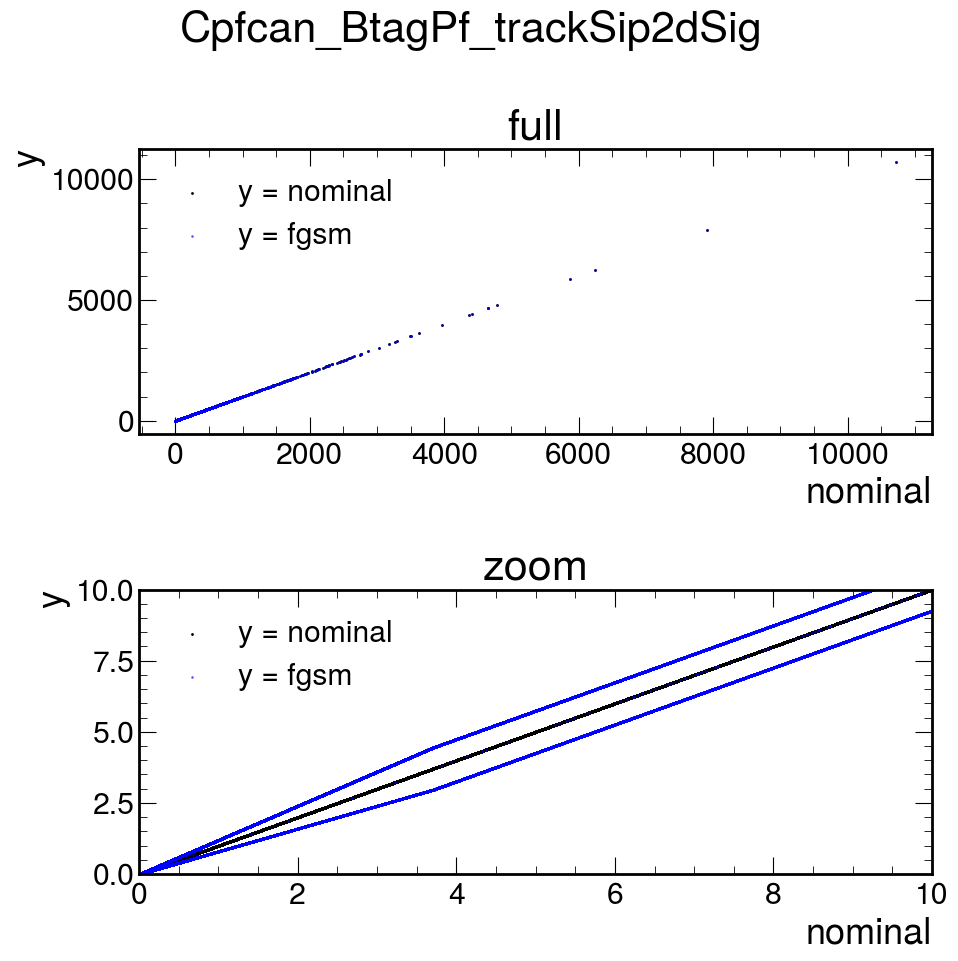

<Figure size 1000x1000 with 0 Axes>

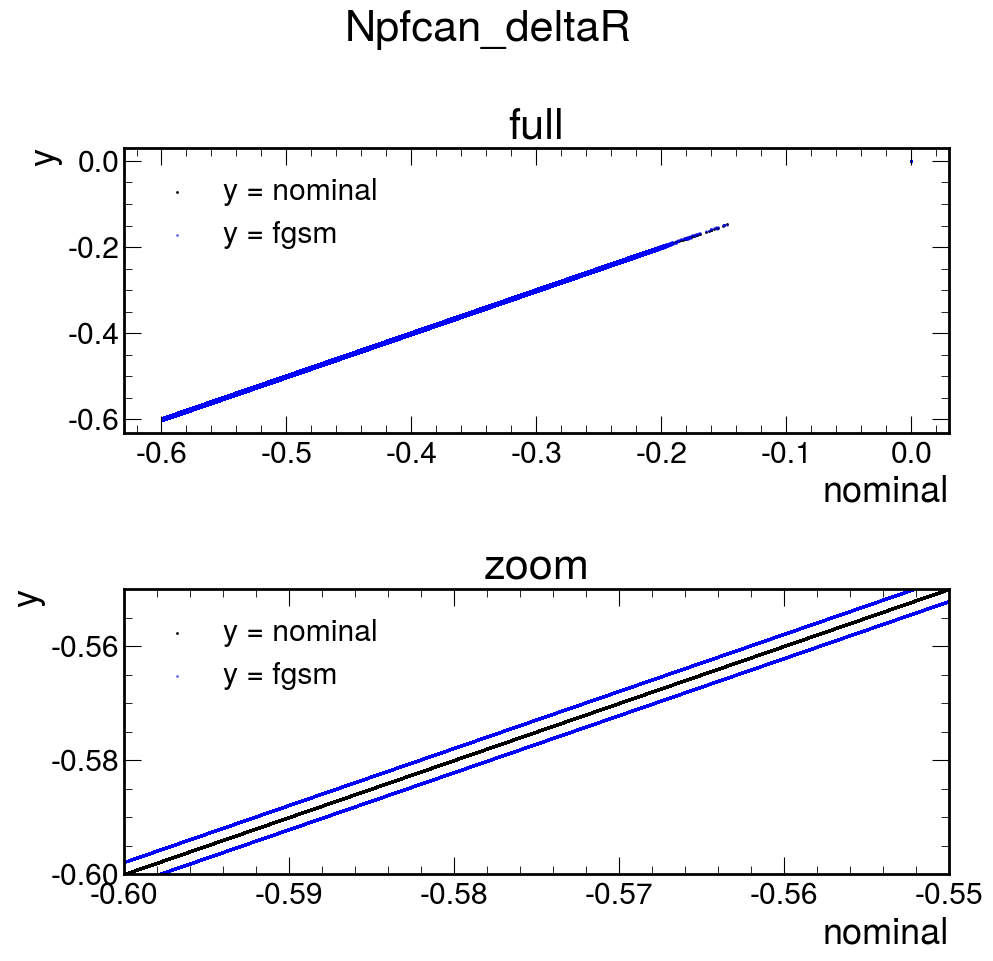

<Figure size 1000x1000 with 0 Axes>

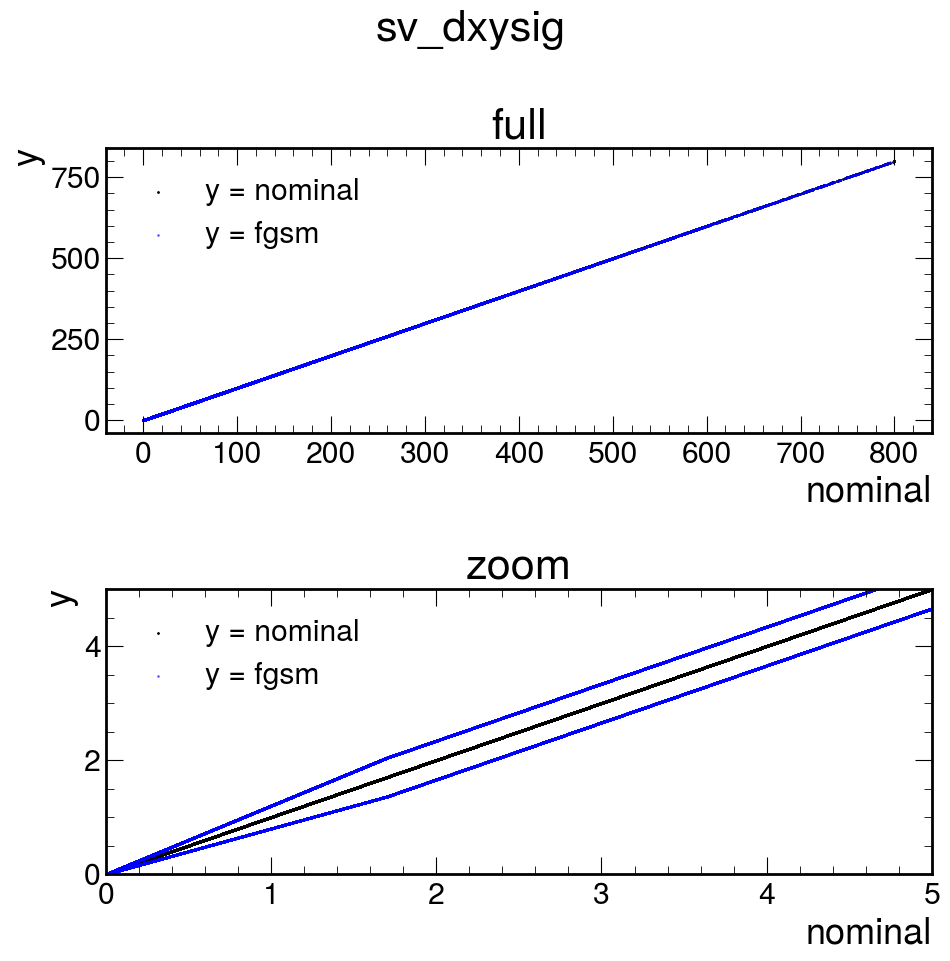

In [19]:
plot_feature("Cpfcan_BtagPf_trackSip2dSig", cpf_nom, cpf_fgsm, "fgsm", [0,10])
plot_feature("Npfcan_deltaR", npf_nom, npf_fgsm, "fgsm", [-0.6,-0.55])
plot_feature("sv_dxysig", vtx_nom, vtx_fgsm, "fgsm", [0,5])

<Figure size 1000x1000 with 0 Axes>

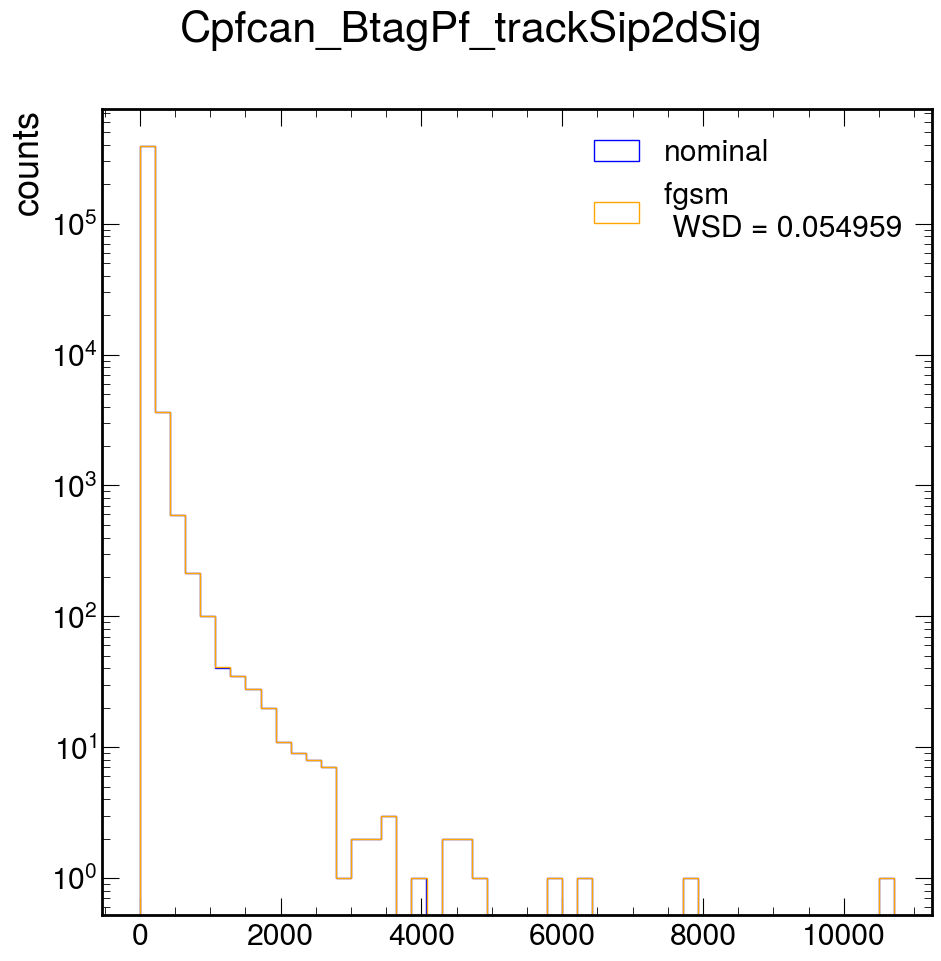

<Figure size 1000x1000 with 0 Axes>

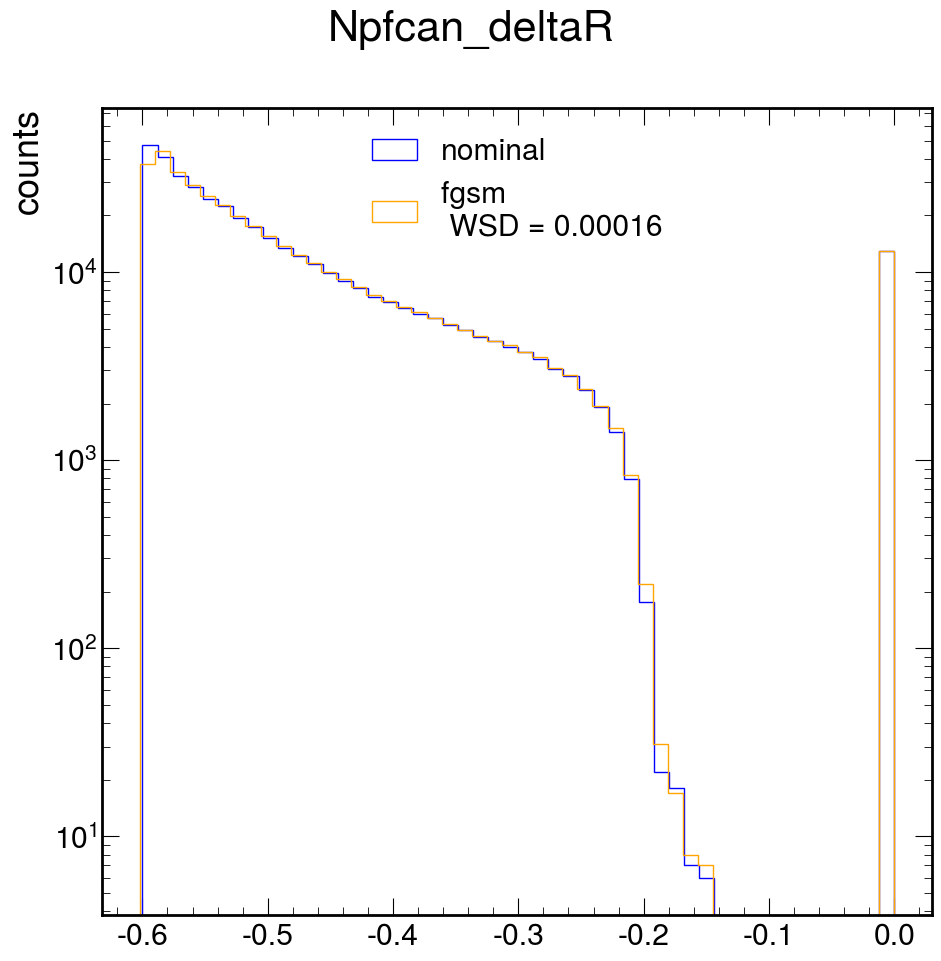

<Figure size 1000x1000 with 0 Axes>

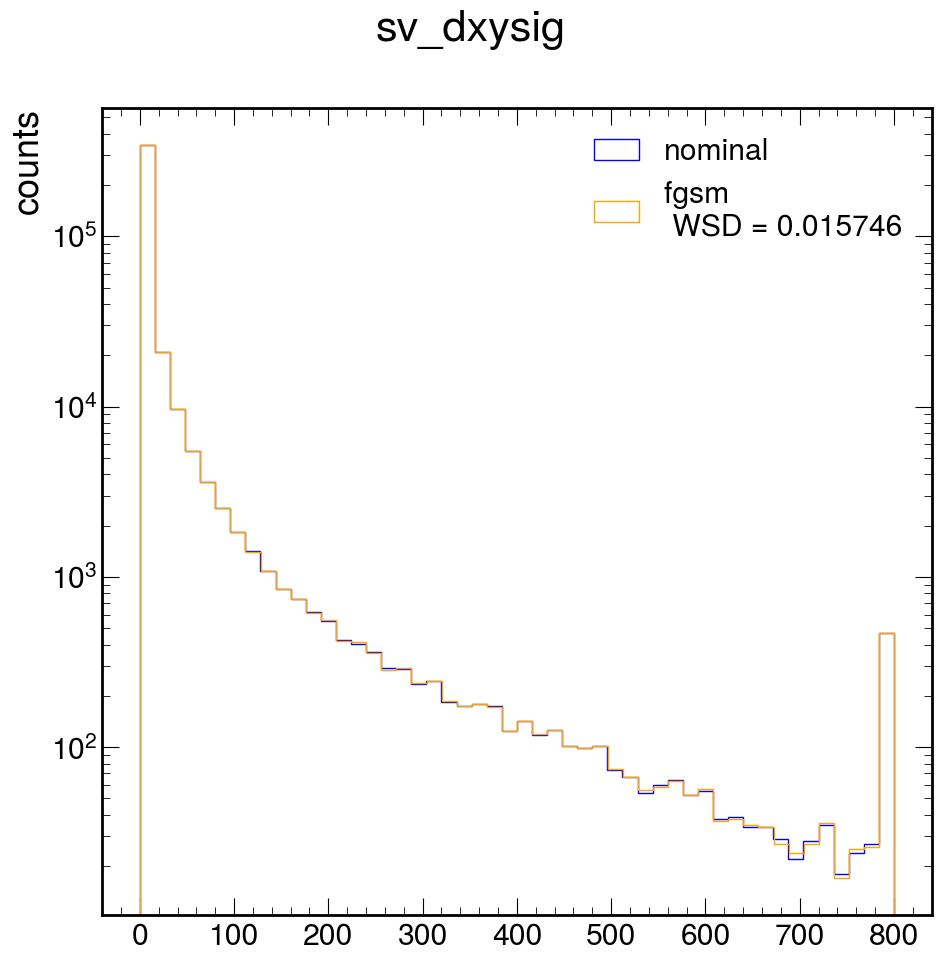

In [19]:
wsd_cpf.append(plot_hist("Cpfcan_BtagPf_trackSip2dSig", cpf_nom, cpf_fgsm, "fgsm"))
wsd_npf.append(plot_hist("Npfcan_deltaR", npf_nom, npf_fgsm, "fgsm"))
wsd_vtx.append(plot_hist("sv_dxysig", vtx_nom, vtx_fgsm, "fgsm"))

# Nominal vs PGD (1)

<Figure size 1000x1000 with 0 Axes>

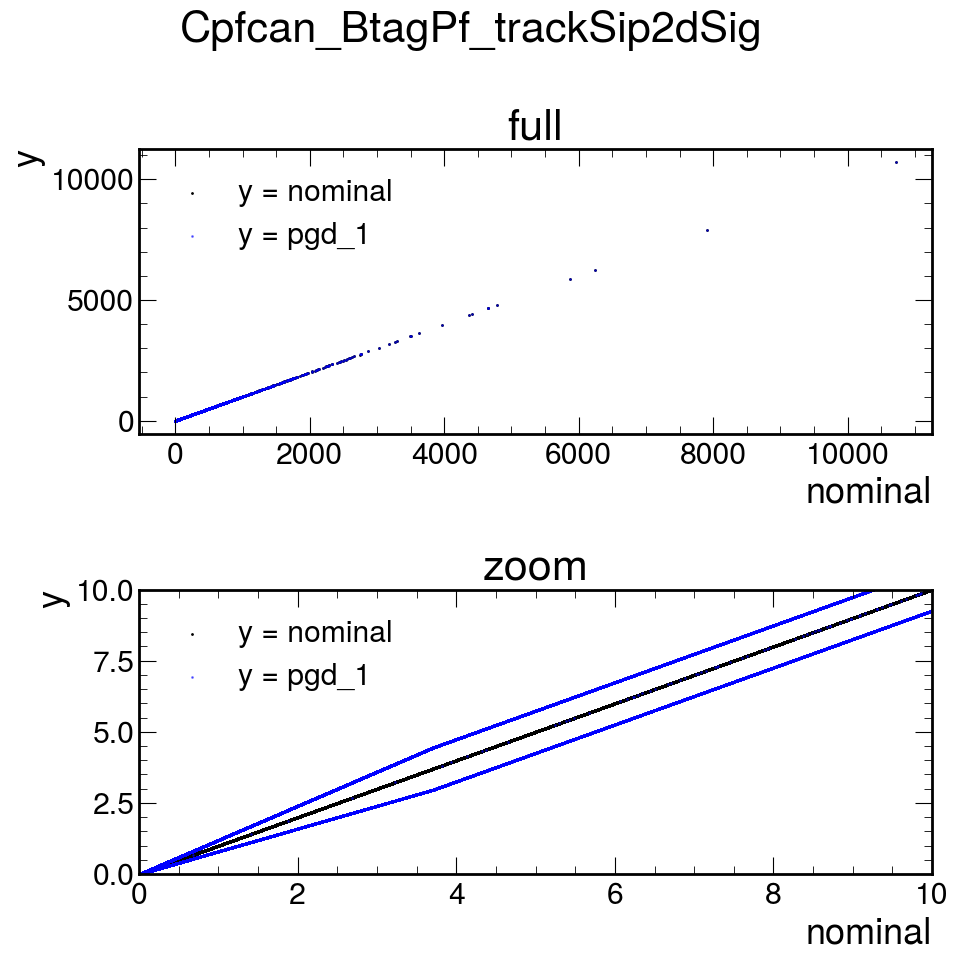

<Figure size 1000x1000 with 0 Axes>

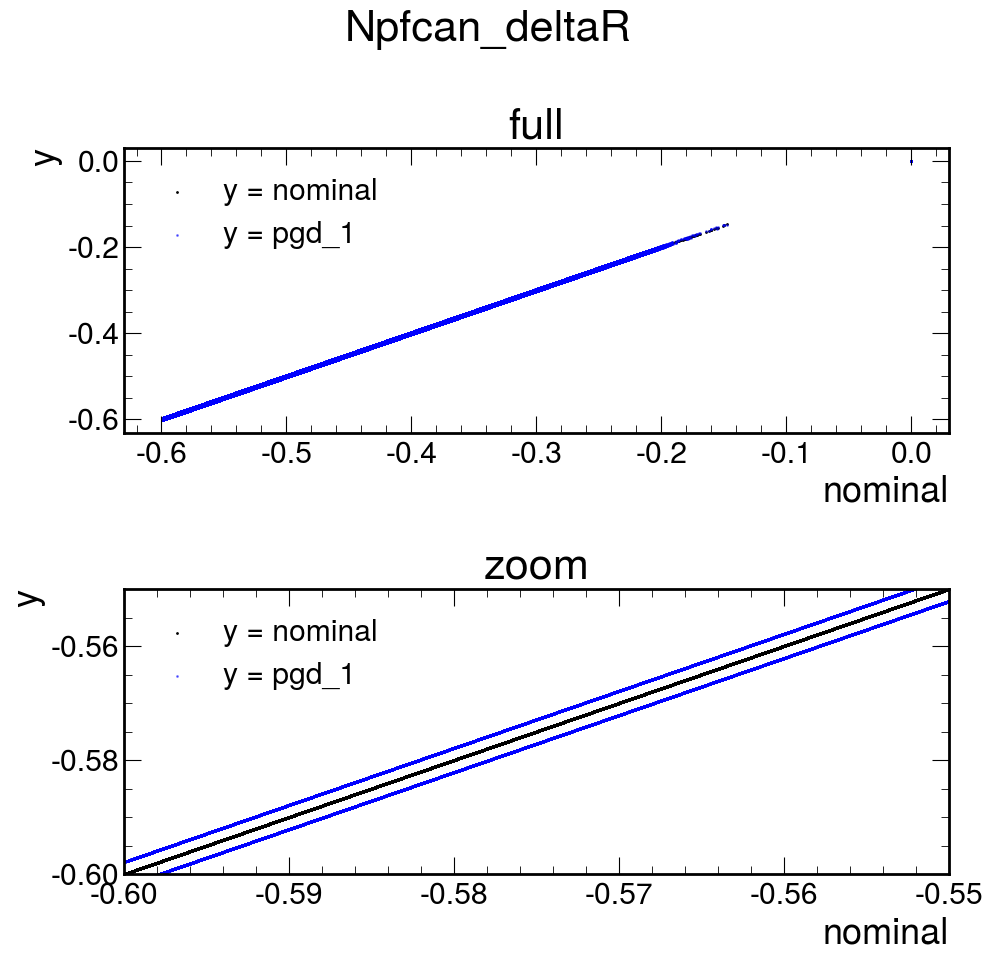

<Figure size 1000x1000 with 0 Axes>

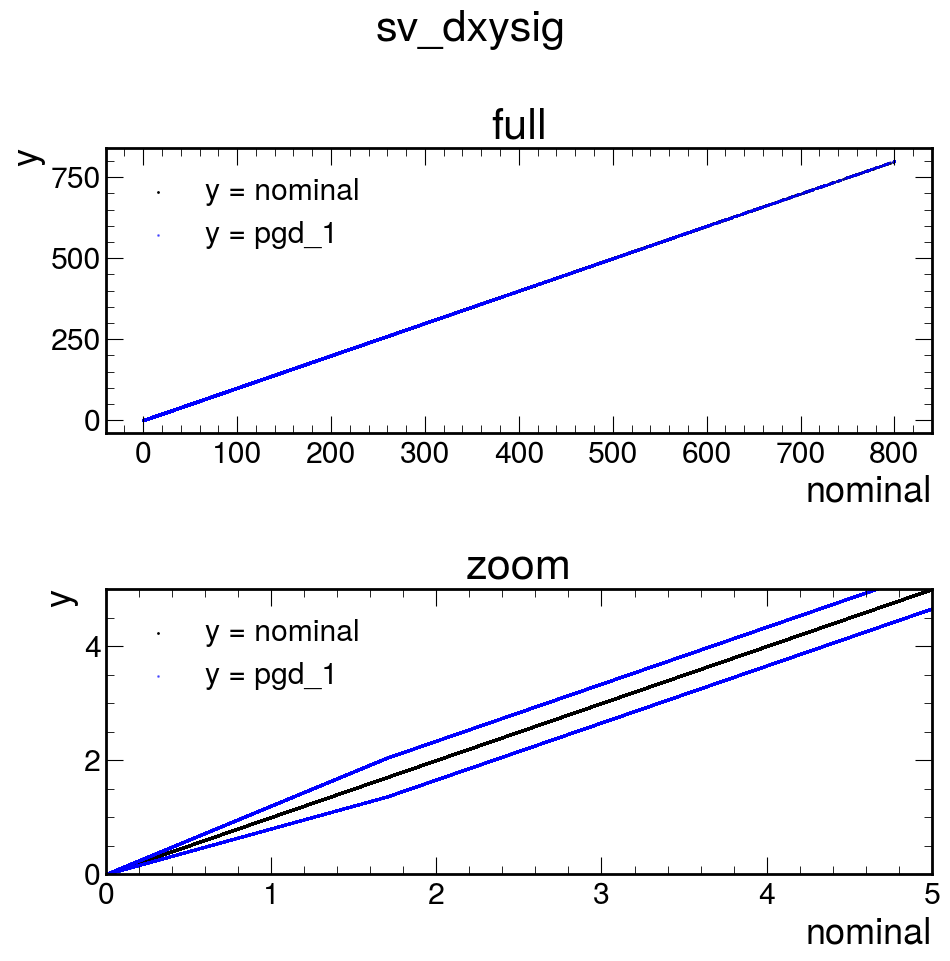

In [36]:
plot_feature("Cpfcan_BtagPf_trackSip2dSig", cpf_nom, cpf_pgd_1, "pgd_1", [0,10])
plot_feature("Npfcan_deltaR", npf_nom, npf_pgd_1, "pgd_1", [-0.6,-0.55])
plot_feature("sv_dxysig", vtx_nom, vtx_pgd_1, "pgd_1", [0,5])

<Figure size 1000x1000 with 0 Axes>

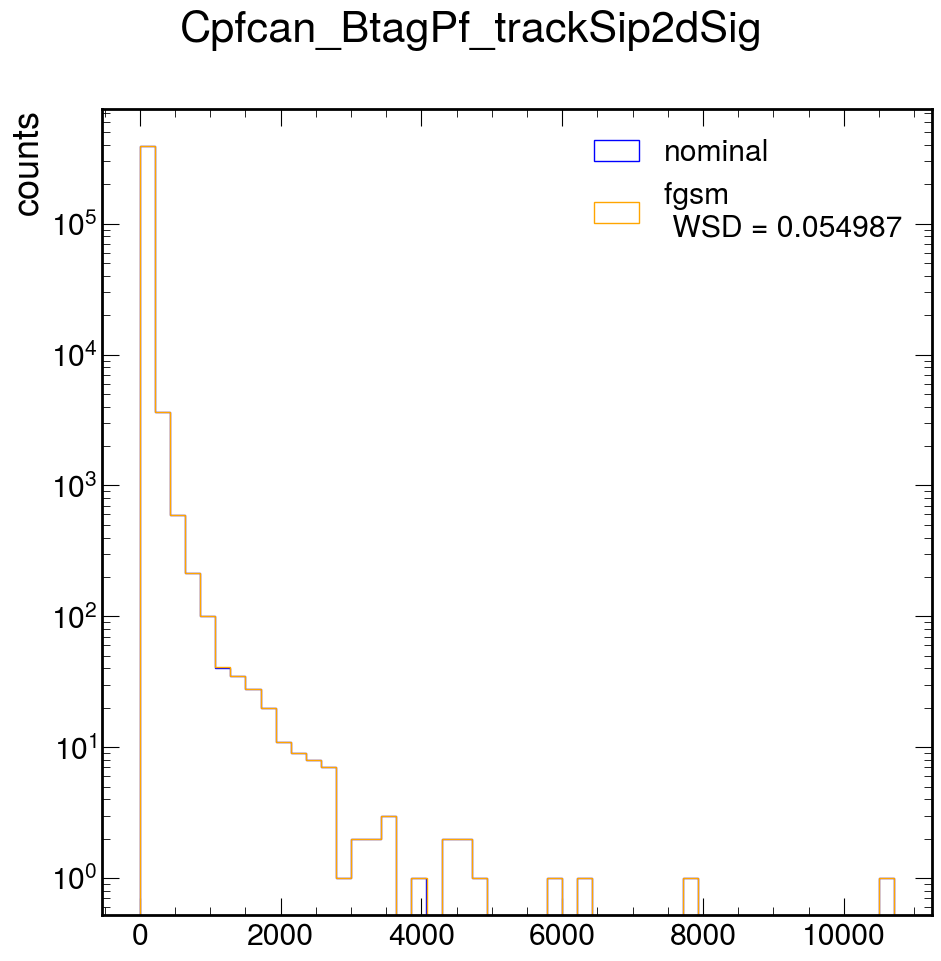

<Figure size 1000x1000 with 0 Axes>

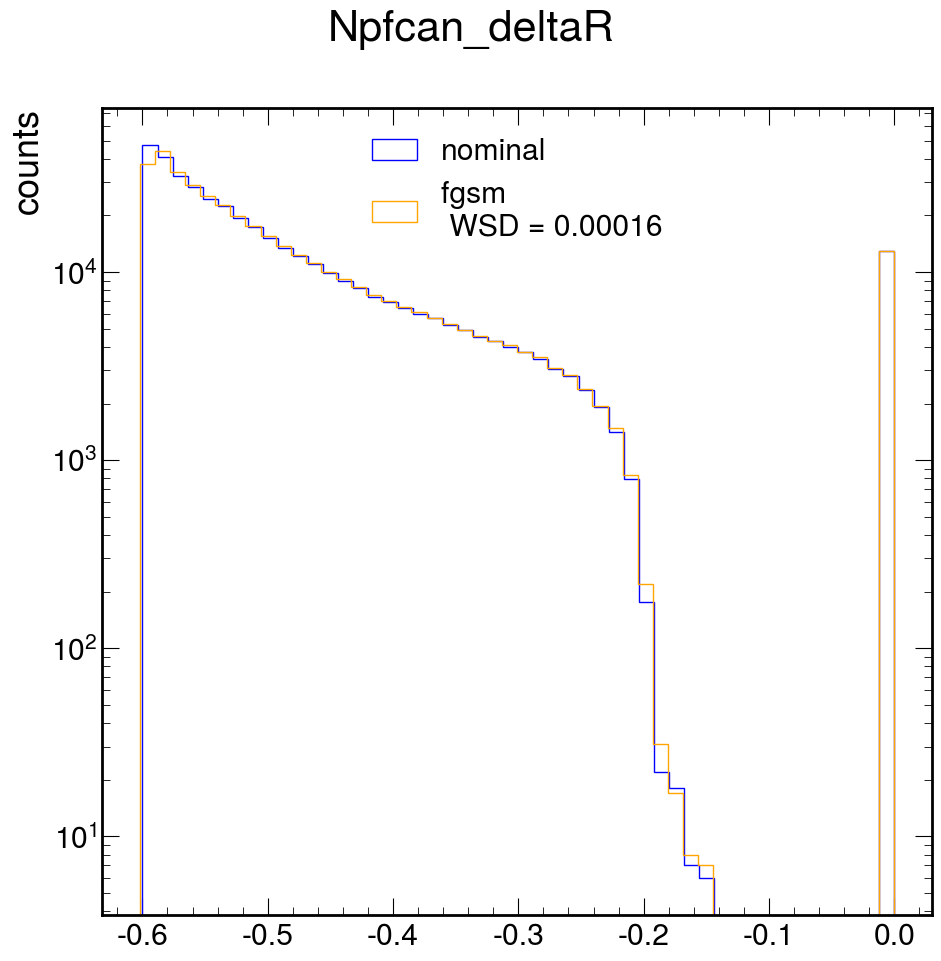

<Figure size 1000x1000 with 0 Axes>

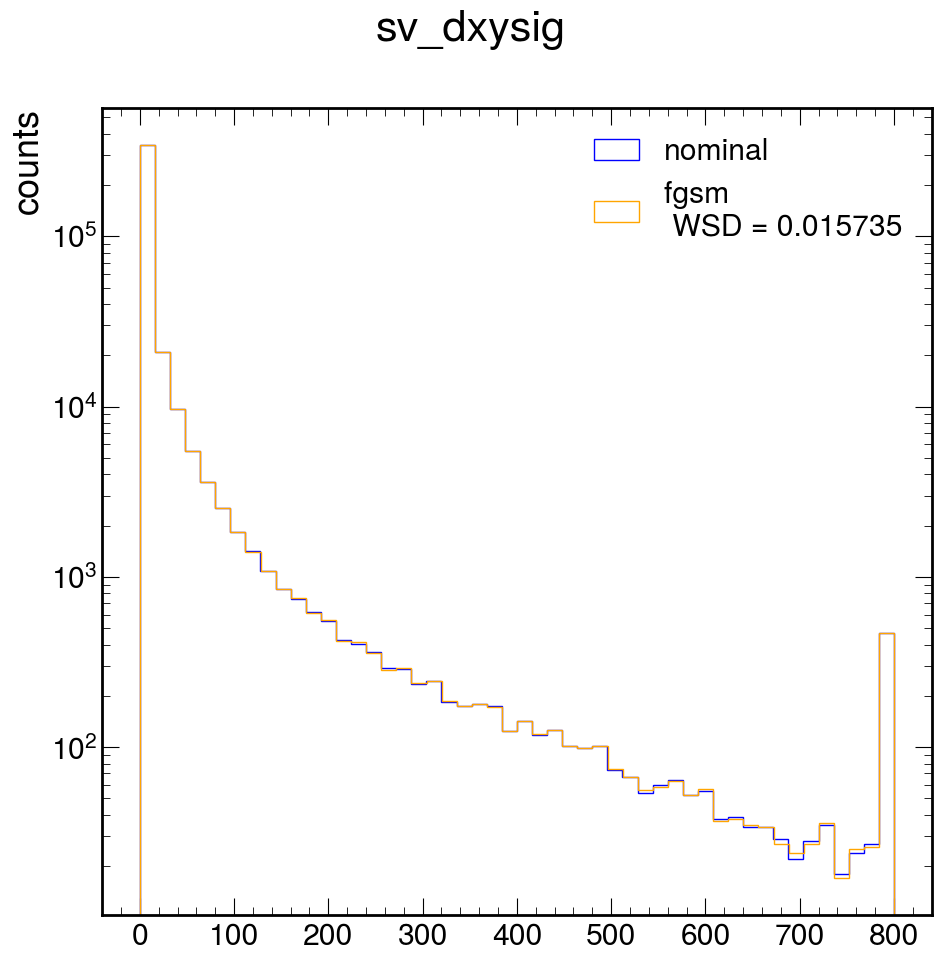

In [20]:
wsd_cpf.append(plot_hist("Cpfcan_BtagPf_trackSip2dSig", cpf_nom, cpf_pgd_1, "pgd_1"))
wsd_npf.append(plot_hist("Npfcan_deltaR", npf_nom, npf_pgd_1, "pgd_1"))
wsd_vtx.append(plot_hist("sv_dxysig", vtx_nom, vtx_pgd_1, "pgd_1"))

# Nominal vs PGD (2)

<Figure size 1000x1000 with 0 Axes>

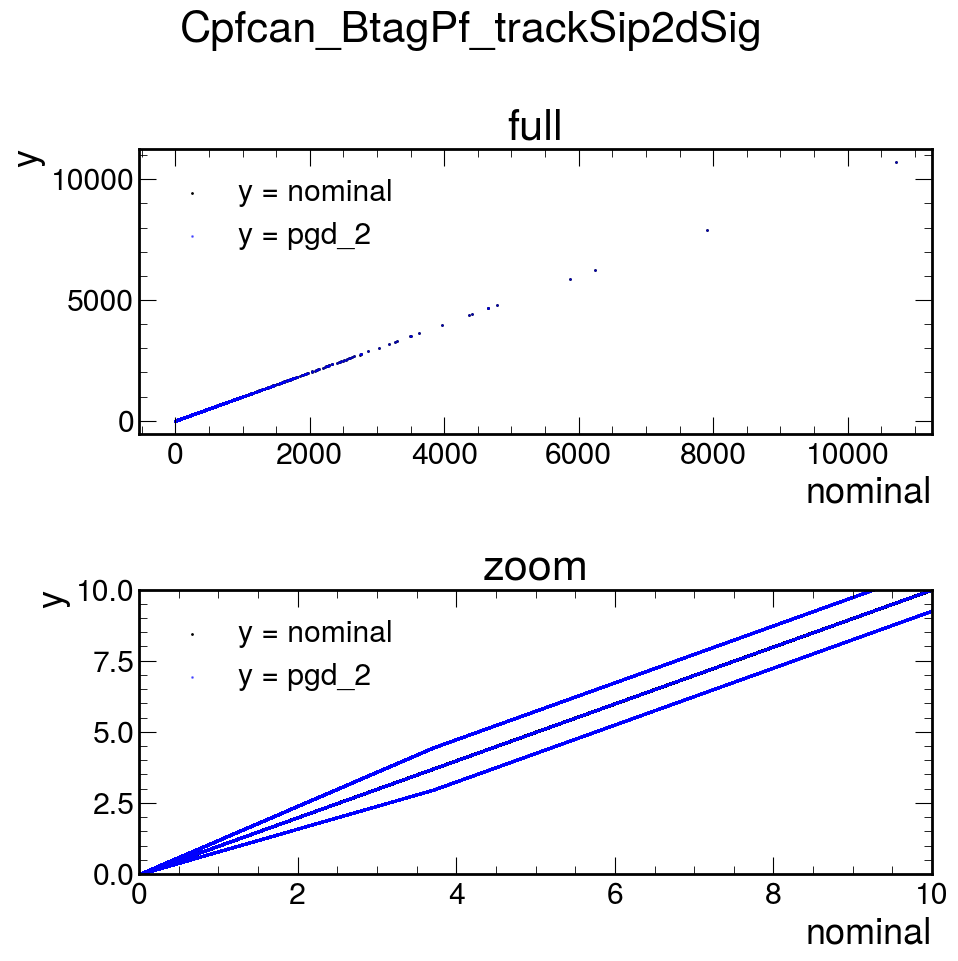

<Figure size 1000x1000 with 0 Axes>

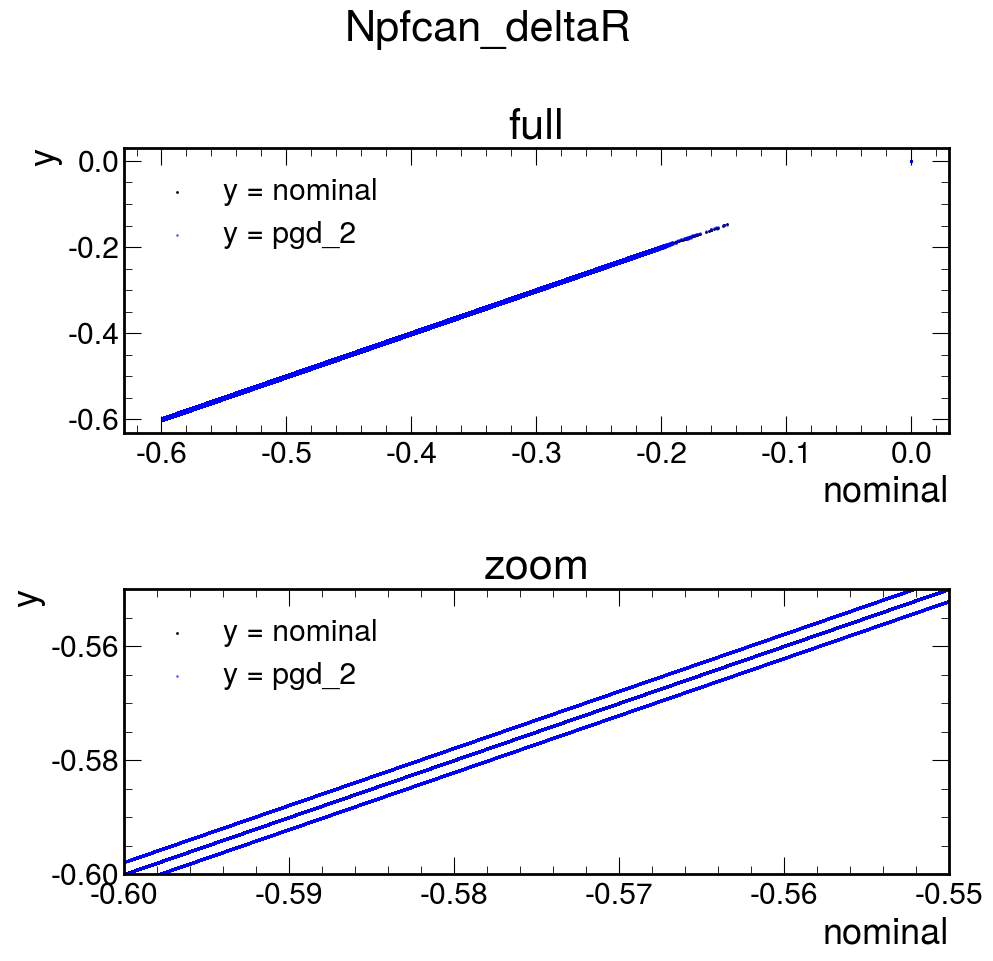

<Figure size 1000x1000 with 0 Axes>

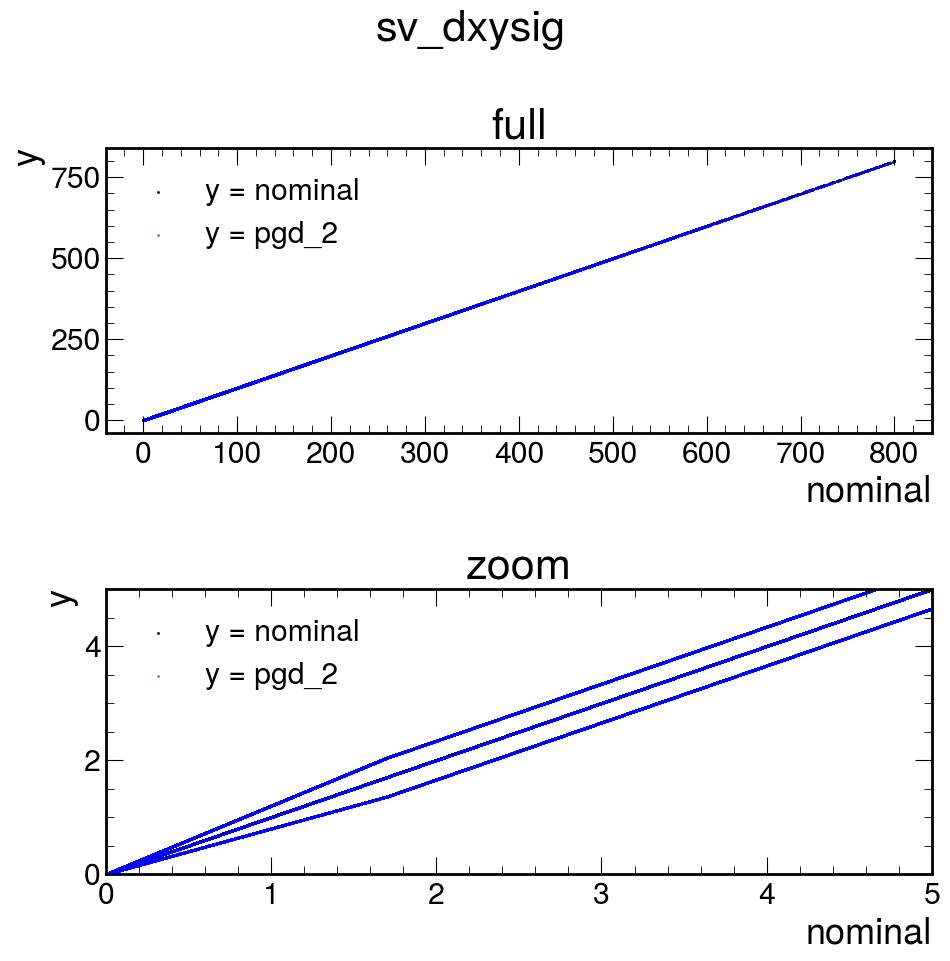

In [39]:
plot_feature("Cpfcan_BtagPf_trackSip2dSig", cpf_nom, cpf_pgd_2, "pgd_2", [0,10])
plot_feature("Npfcan_deltaR", npf_nom, npf_pgd_2, "pgd_2", [-0.6,-0.55])
plot_feature("sv_dxysig", vtx_nom, vtx_pgd_2, "pgd_2", [0,5])

<Figure size 1000x1000 with 0 Axes>

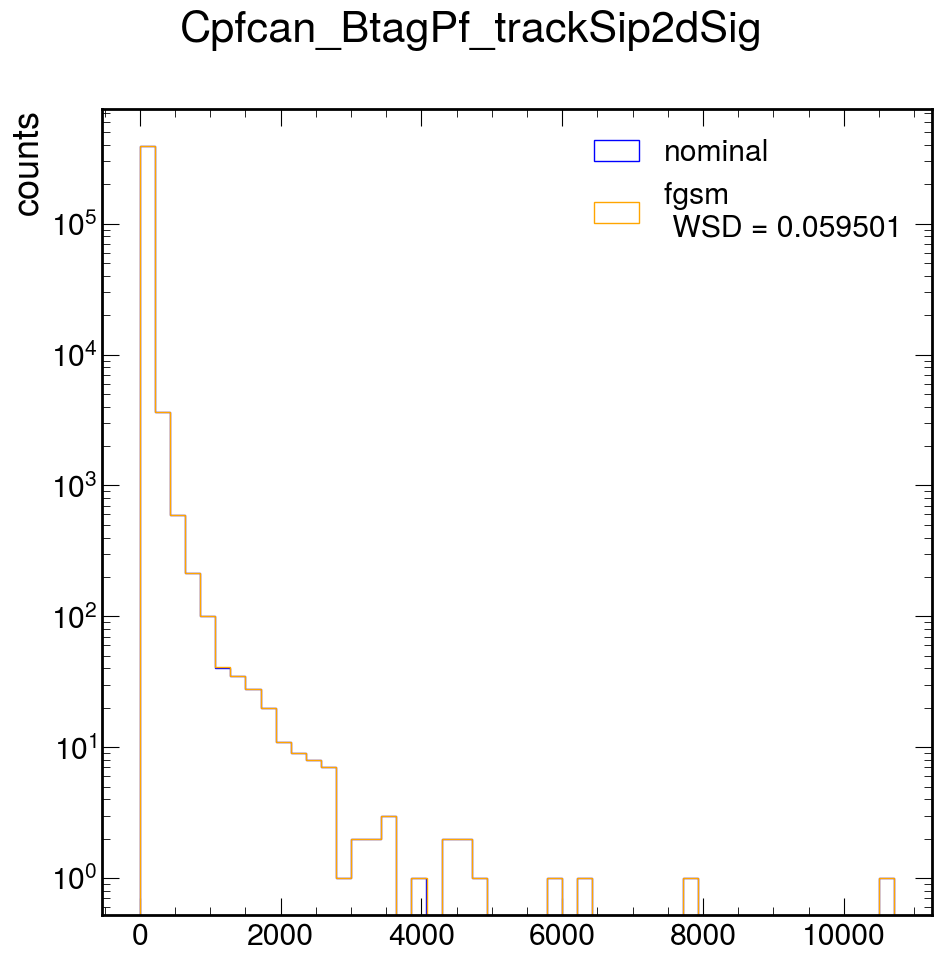

<Figure size 1000x1000 with 0 Axes>

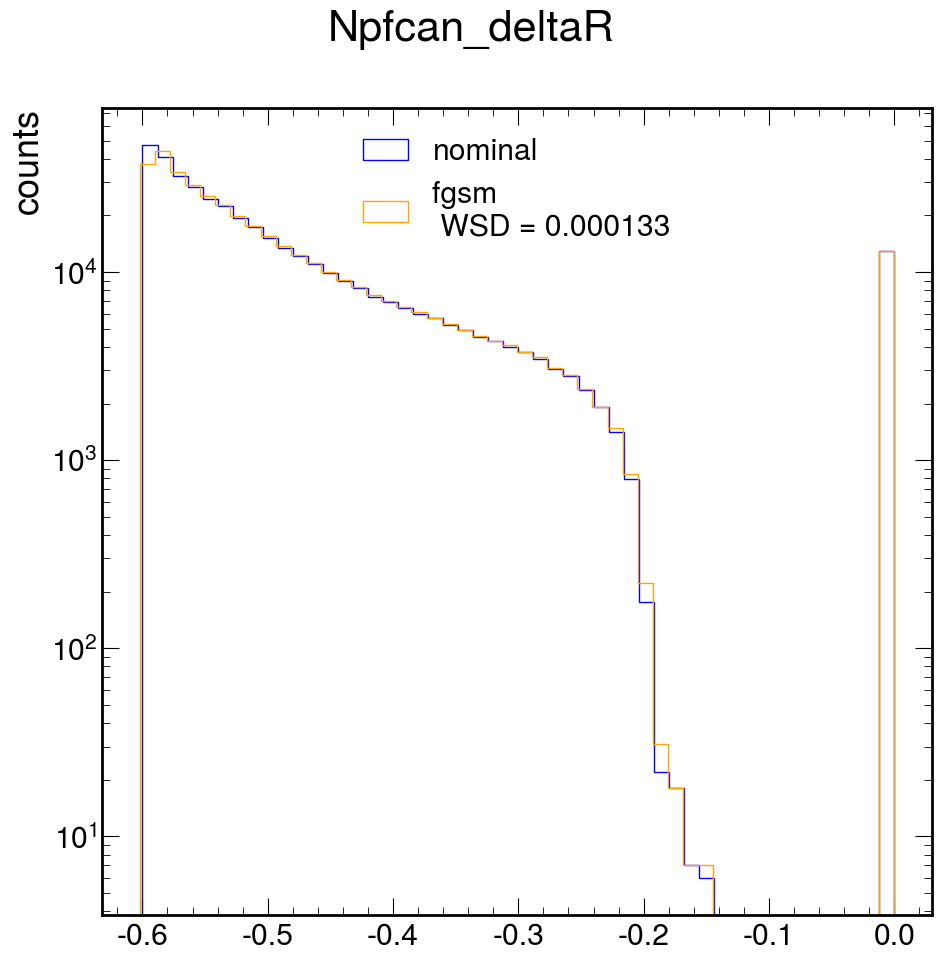

<Figure size 1000x1000 with 0 Axes>

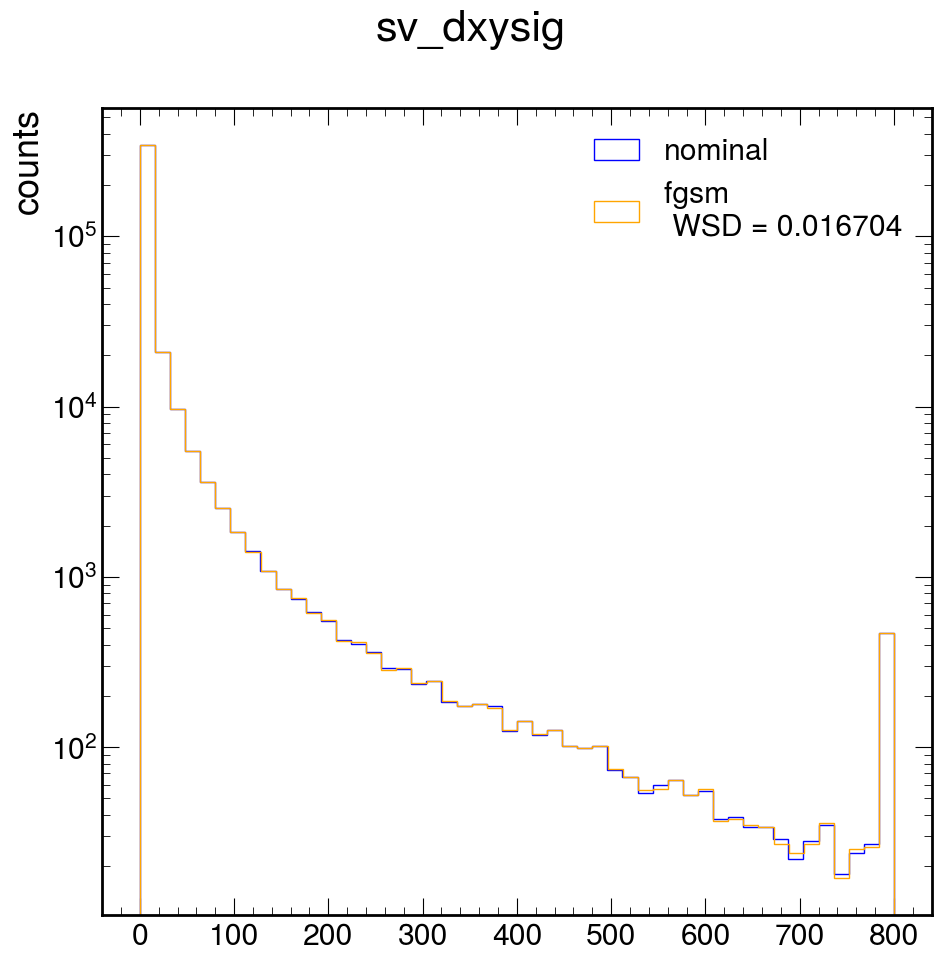

In [21]:
wsd_cpf.append(plot_hist("Cpfcan_BtagPf_trackSip2dSig", cpf_nom, cpf_pgd_2, "pgd_2"))
wsd_npf.append(plot_hist("Npfcan_deltaR", npf_nom, npf_pgd_2, "pgd_2"))
wsd_vtx.append(plot_hist("sv_dxysig", vtx_nom, vtx_pgd_2, "pgd_2"))

# Nominal vs PGD (3)

<Figure size 1000x1000 with 0 Axes>

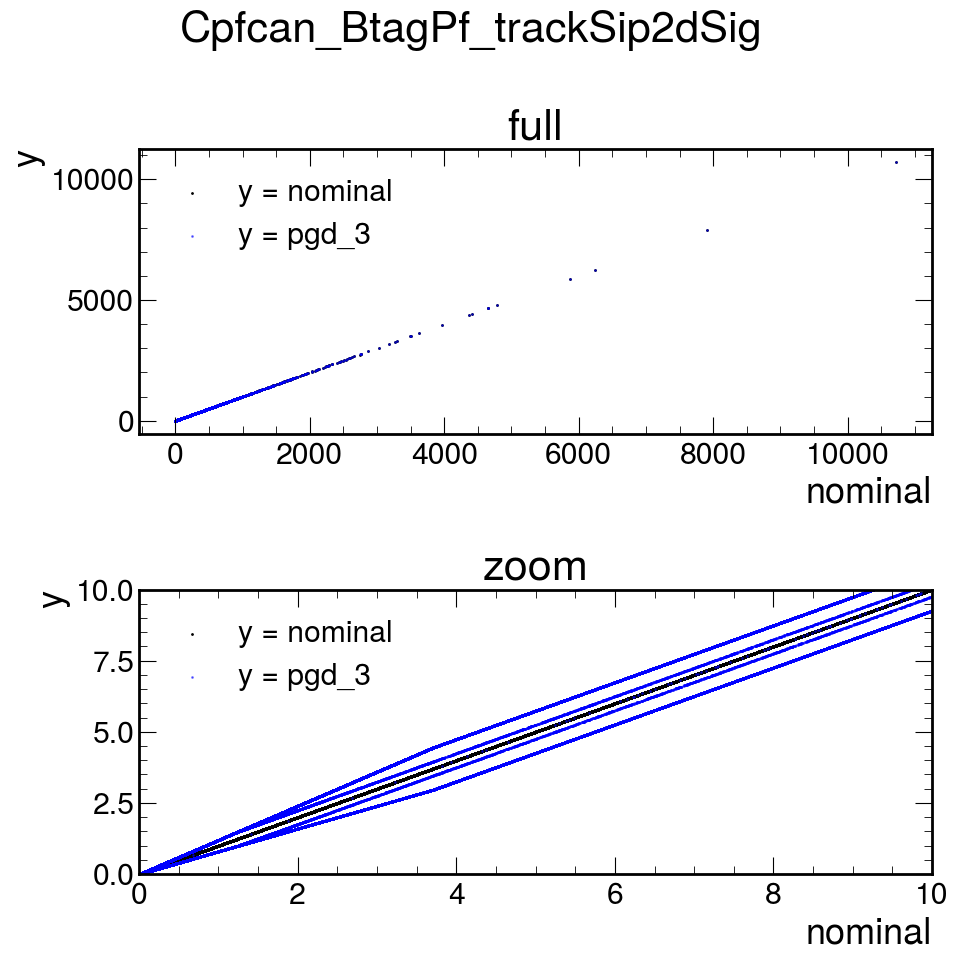

<Figure size 1000x1000 with 0 Axes>

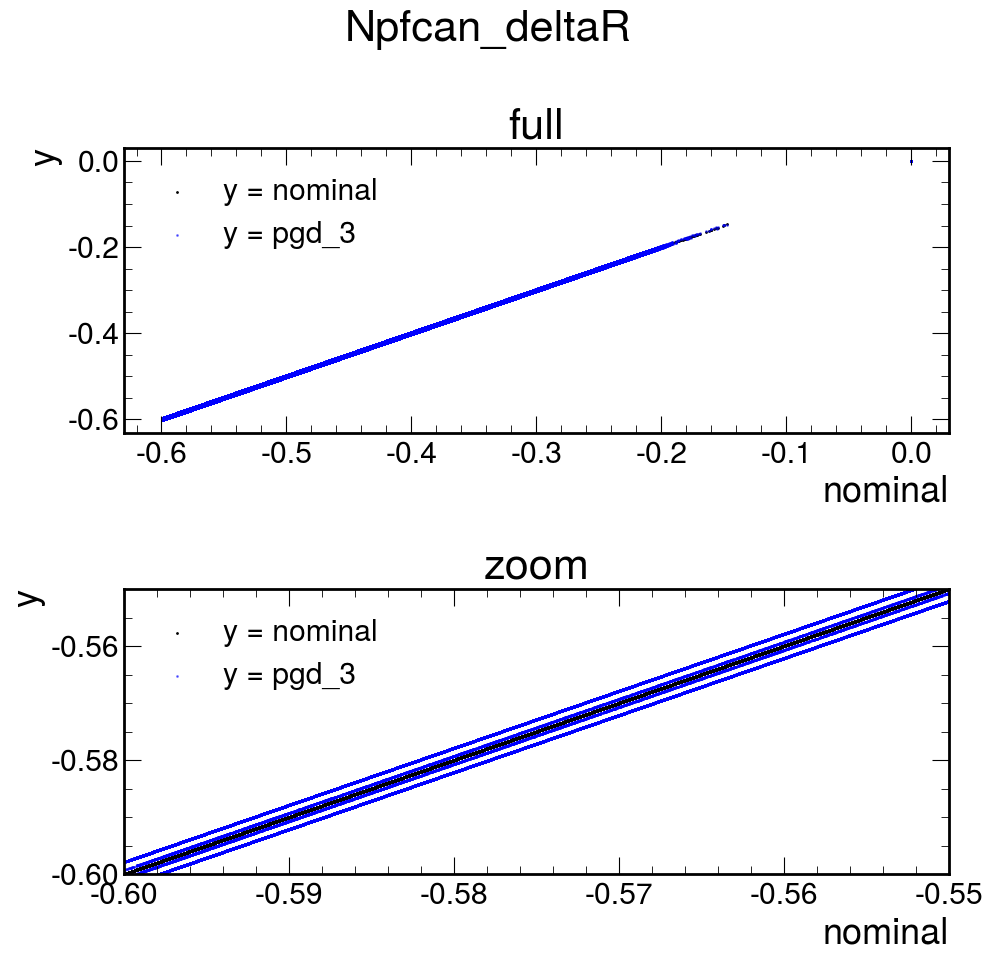

<Figure size 1000x1000 with 0 Axes>

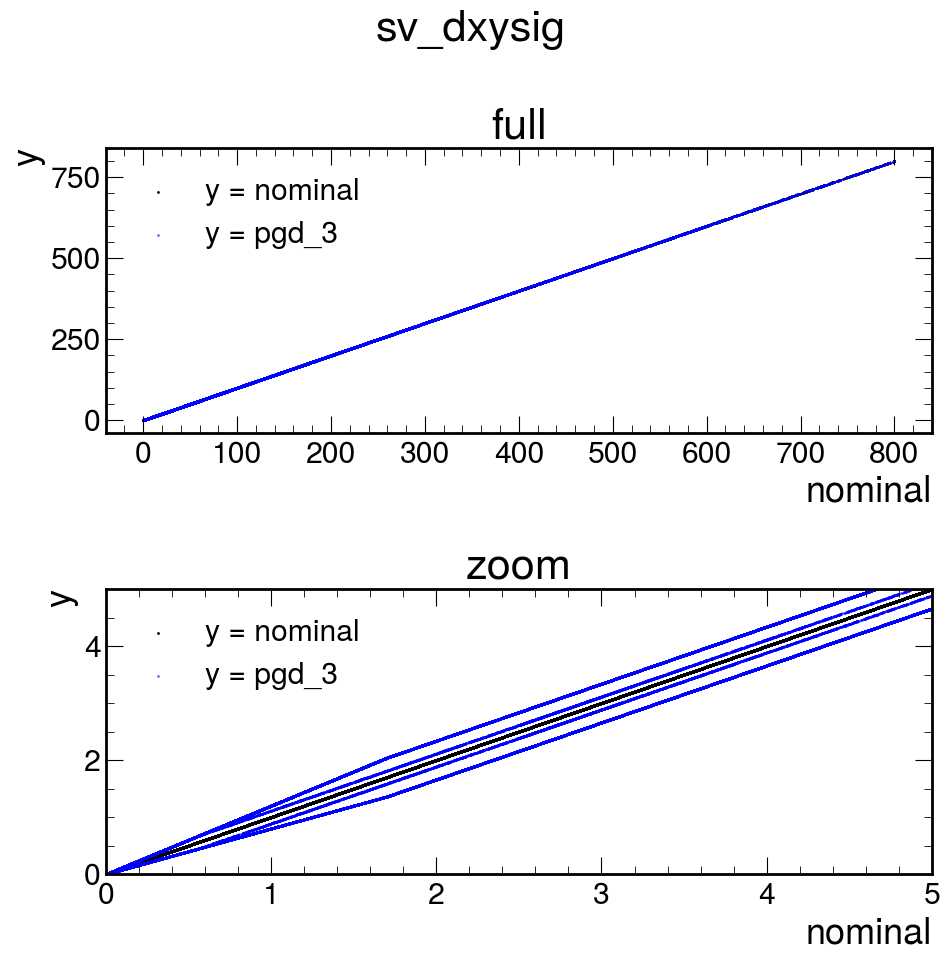

In [41]:
plot_feature("Cpfcan_BtagPf_trackSip2dSig", cpf_nom, cpf_pgd_3, "pgd_3", [0,10])
plot_feature("Npfcan_deltaR", npf_nom, npf_pgd_3, "pgd_3", [-0.6,-0.55])
plot_feature("sv_dxysig", vtx_nom, vtx_pgd_3, "pgd_3", [0,5])

<Figure size 1000x1000 with 0 Axes>

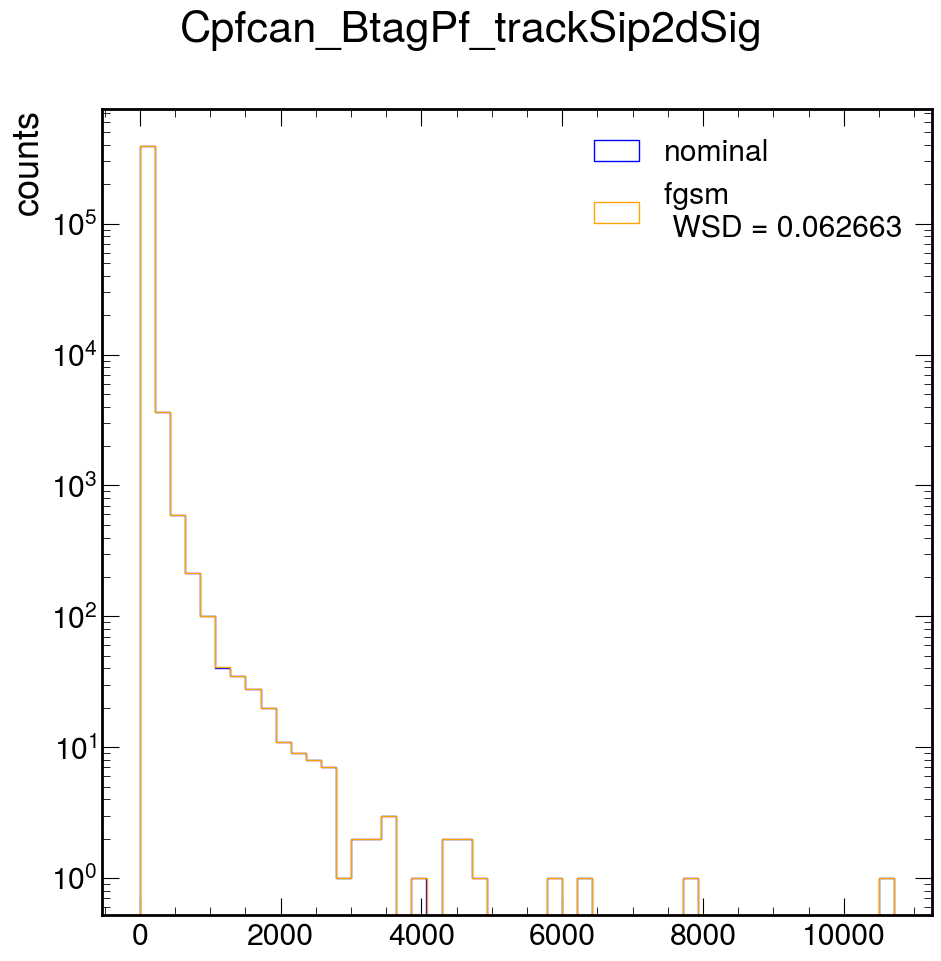

<Figure size 1000x1000 with 0 Axes>

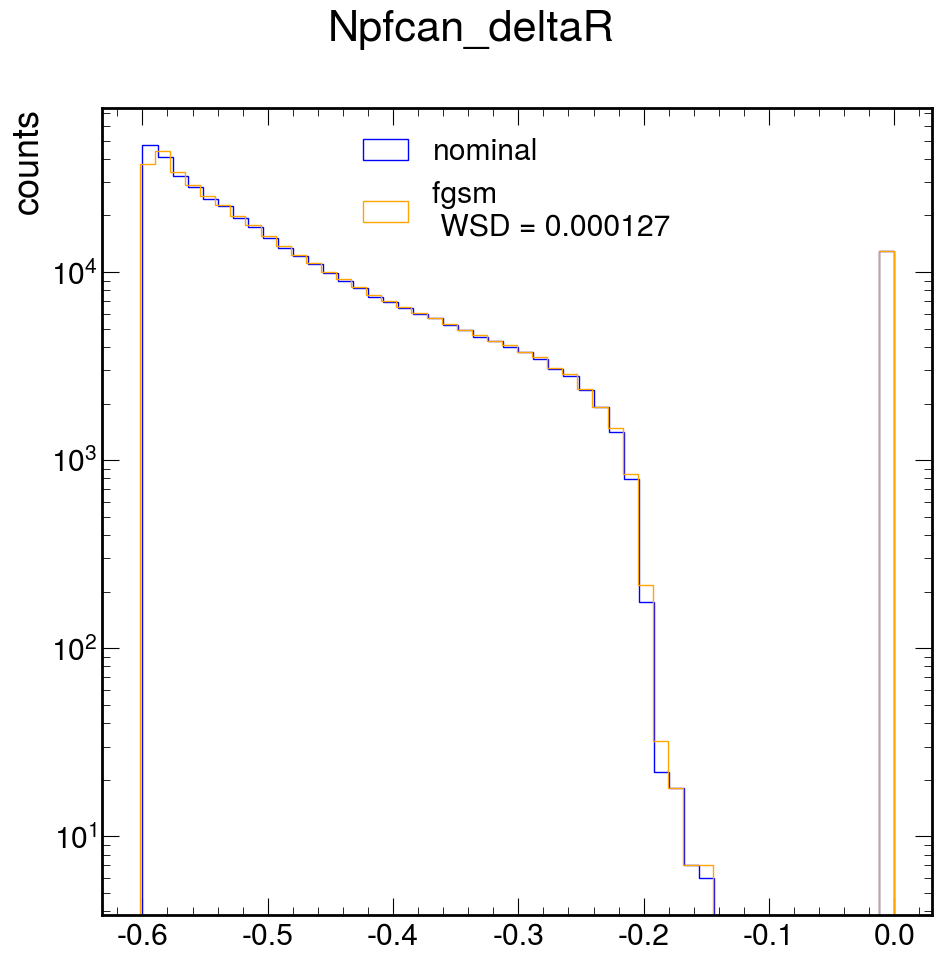

<Figure size 1000x1000 with 0 Axes>

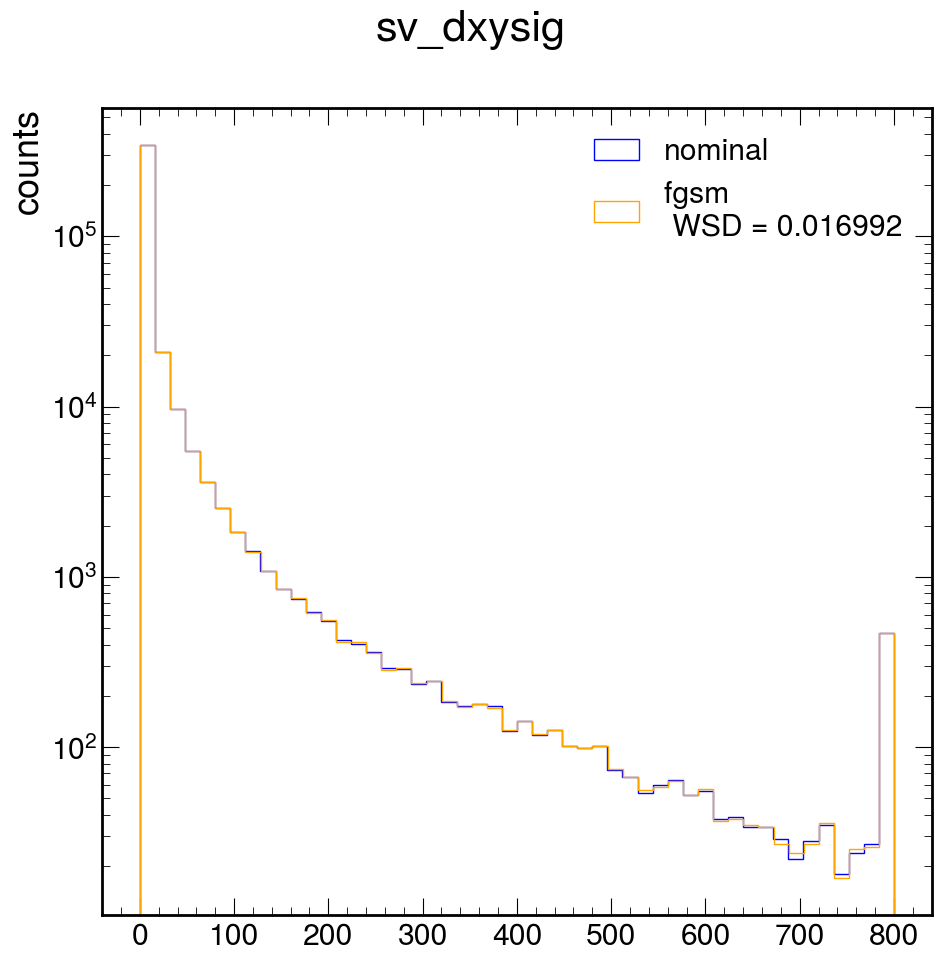

In [22]:
wsd_cpf.append(plot_hist("Cpfcan_BtagPf_trackSip2dSig", cpf_nom, cpf_pgd_3, "pgd_3"))
wsd_npf.append(plot_hist("Npfcan_deltaR", npf_nom, npf_pgd_3, "pgd_3"))
wsd_vtx.append(plot_hist("sv_dxysig", vtx_nom, vtx_pgd_3, "pgd_3"))

# Nominal vs PGD (4)

<Figure size 1000x1000 with 0 Axes>

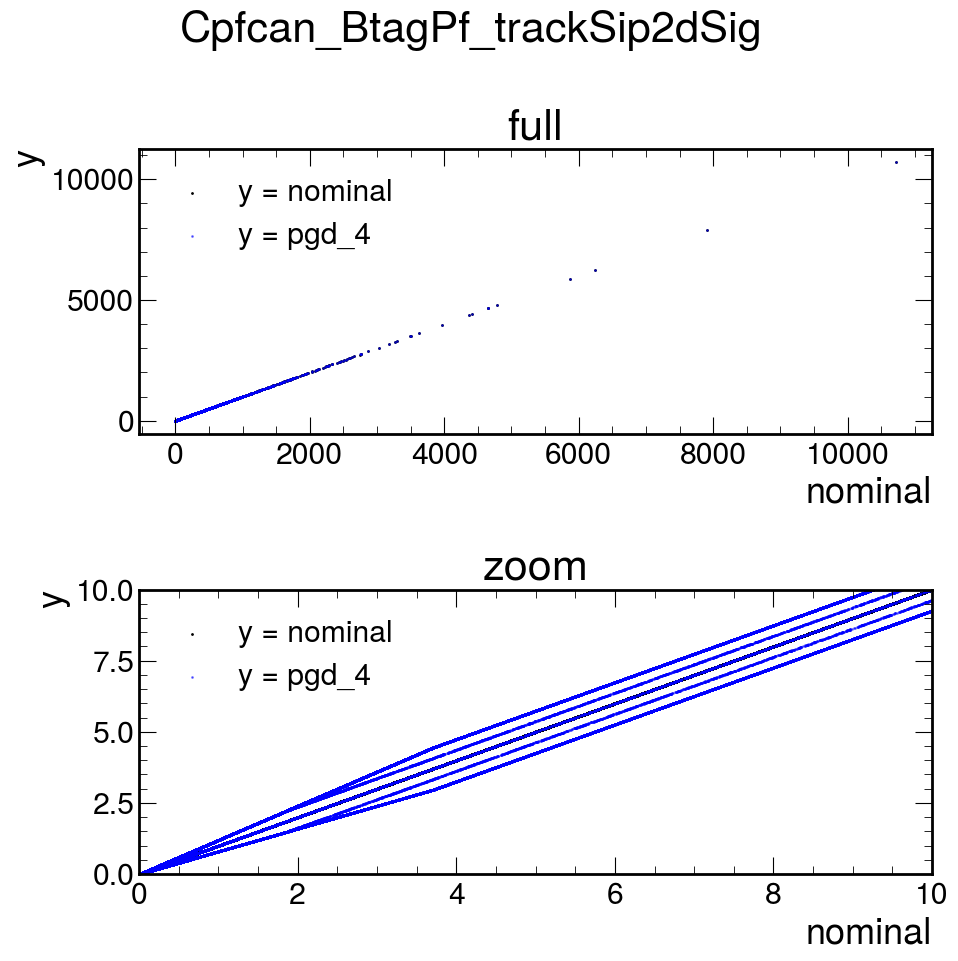

<Figure size 1000x1000 with 0 Axes>

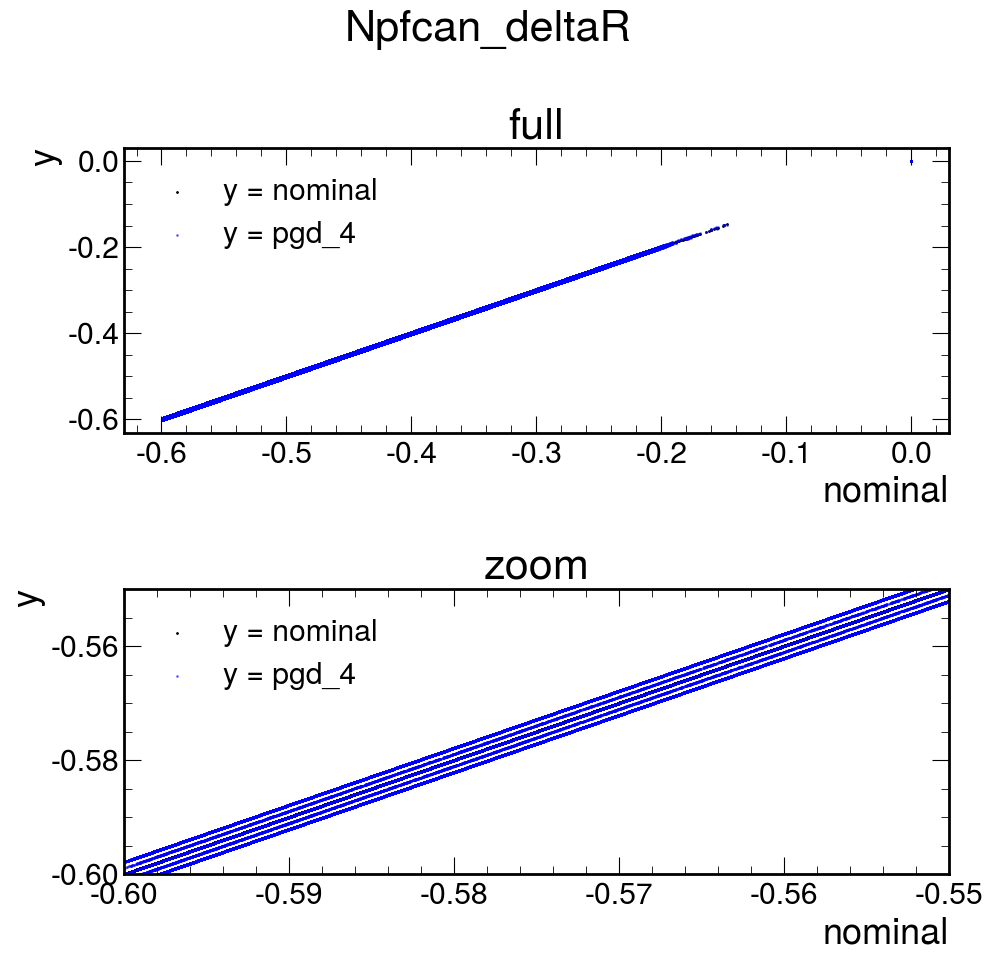

<Figure size 1000x1000 with 0 Axes>

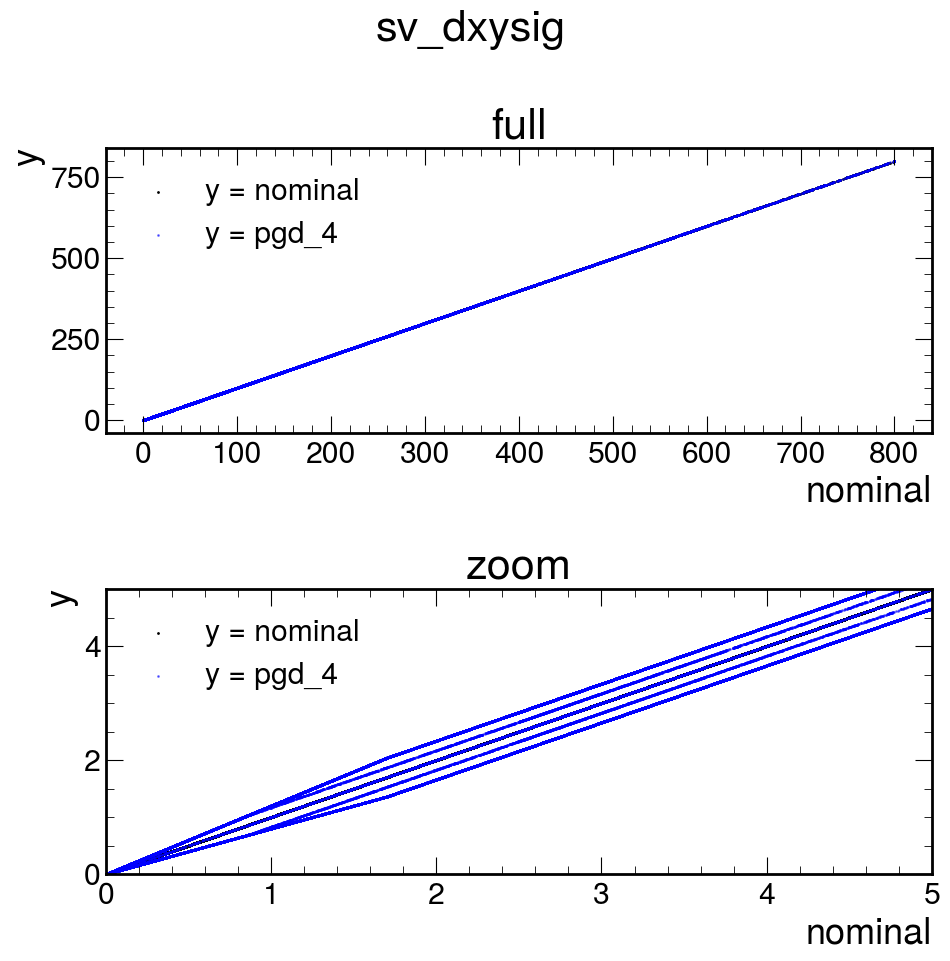

In [44]:
plot_feature("Cpfcan_BtagPf_trackSip2dSig", cpf_nom, cpf_pgd_4, "pgd_4", [0,10])
plot_feature("Npfcan_deltaR", npf_nom, npf_pgd_4, "pgd_4", [-0.6,-0.55])
plot_feature("sv_dxysig", vtx_nom, vtx_pgd_4, "pgd_4", [0,5])

<Figure size 1000x1000 with 0 Axes>

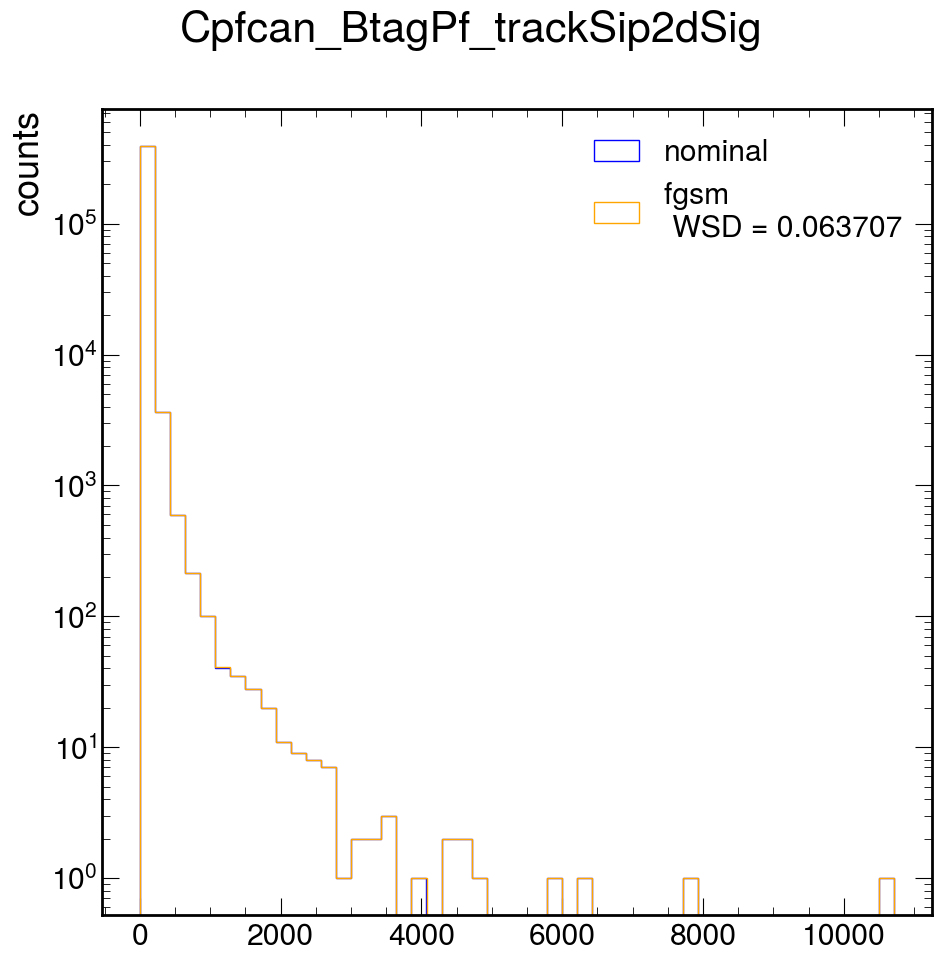

<Figure size 1000x1000 with 0 Axes>

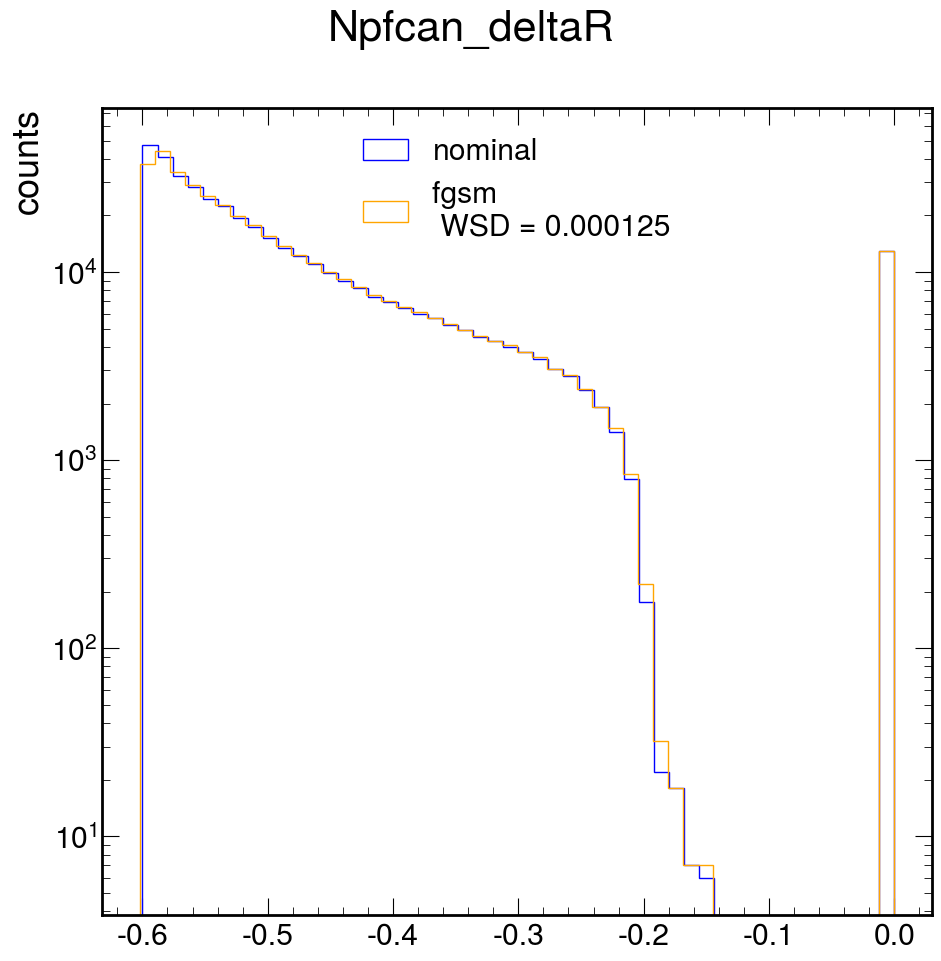

<Figure size 1000x1000 with 0 Axes>

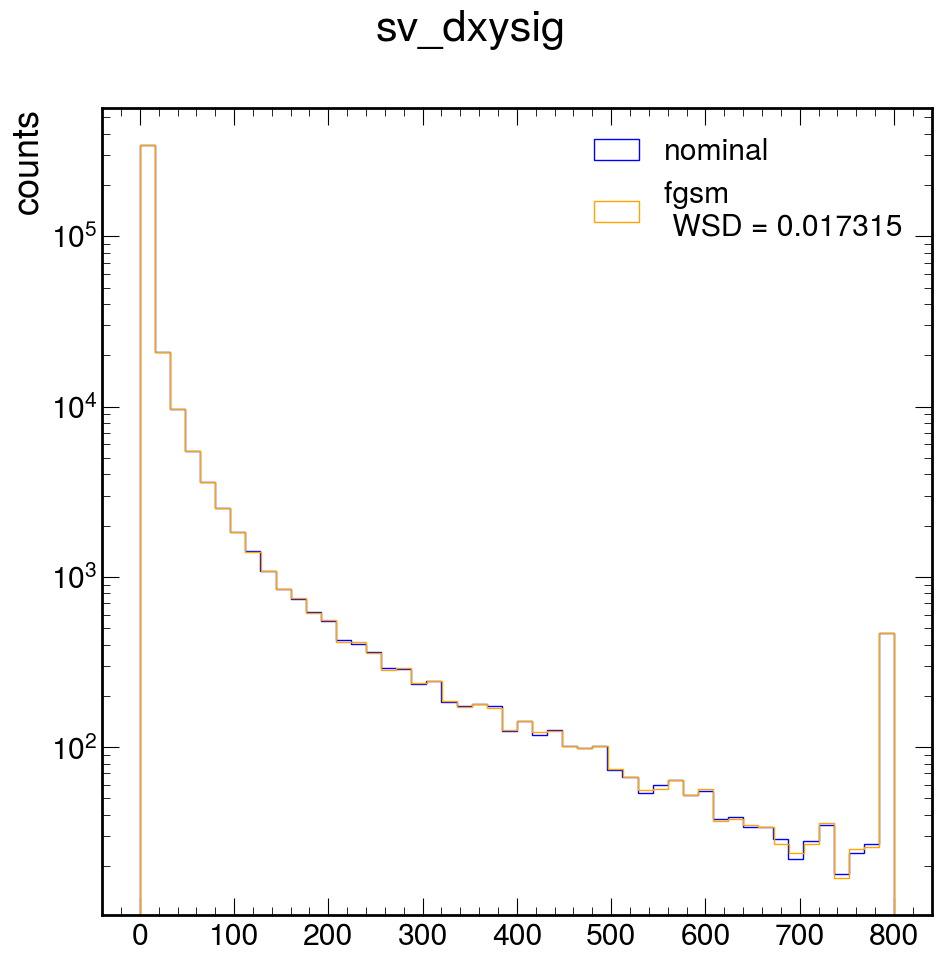

In [23]:
wsd_cpf.append(plot_hist("Cpfcan_BtagPf_trackSip2dSig", cpf_nom, cpf_pgd_4, "pgd_4"))
wsd_npf.append(plot_hist("Npfcan_deltaR", npf_nom, npf_pgd_4, "pgd_4"))
wsd_vtx.append(plot_hist("sv_dxysig", vtx_nom, vtx_pgd_4, "pgd_4"))

# Nominal vs PGD (5)

<Figure size 1000x1000 with 0 Axes>

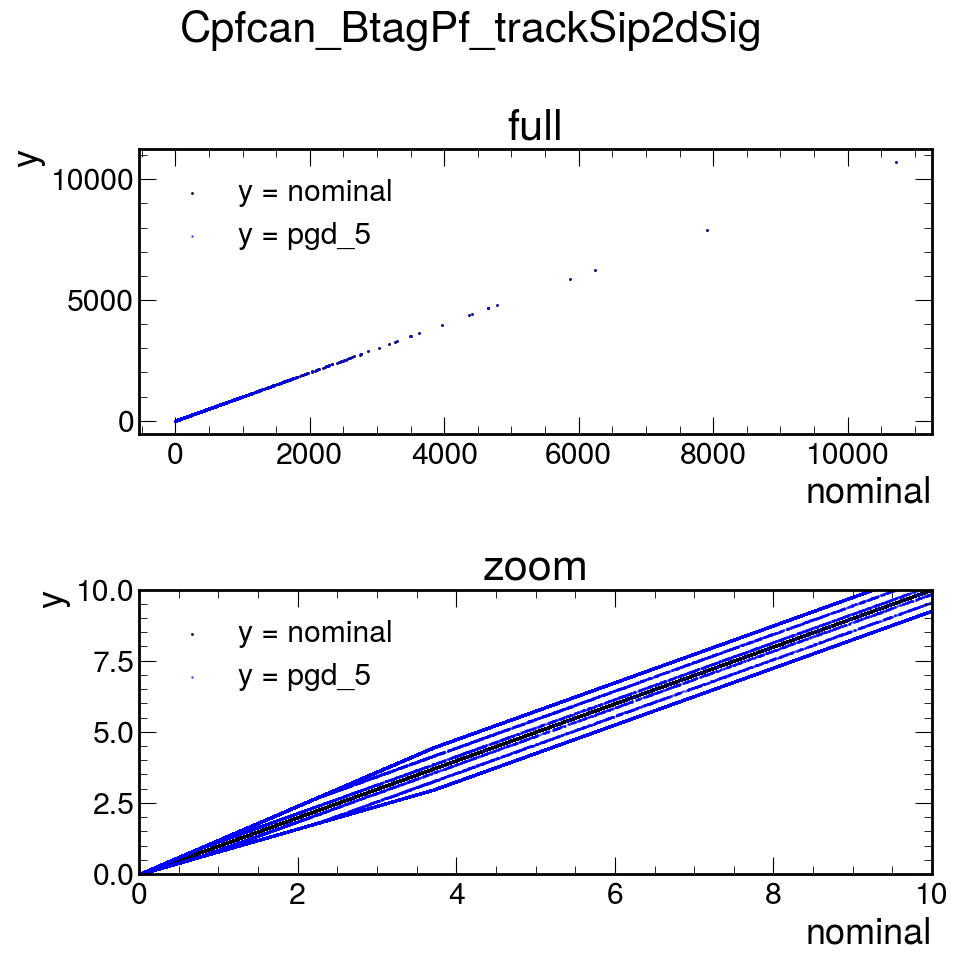

<Figure size 1000x1000 with 0 Axes>

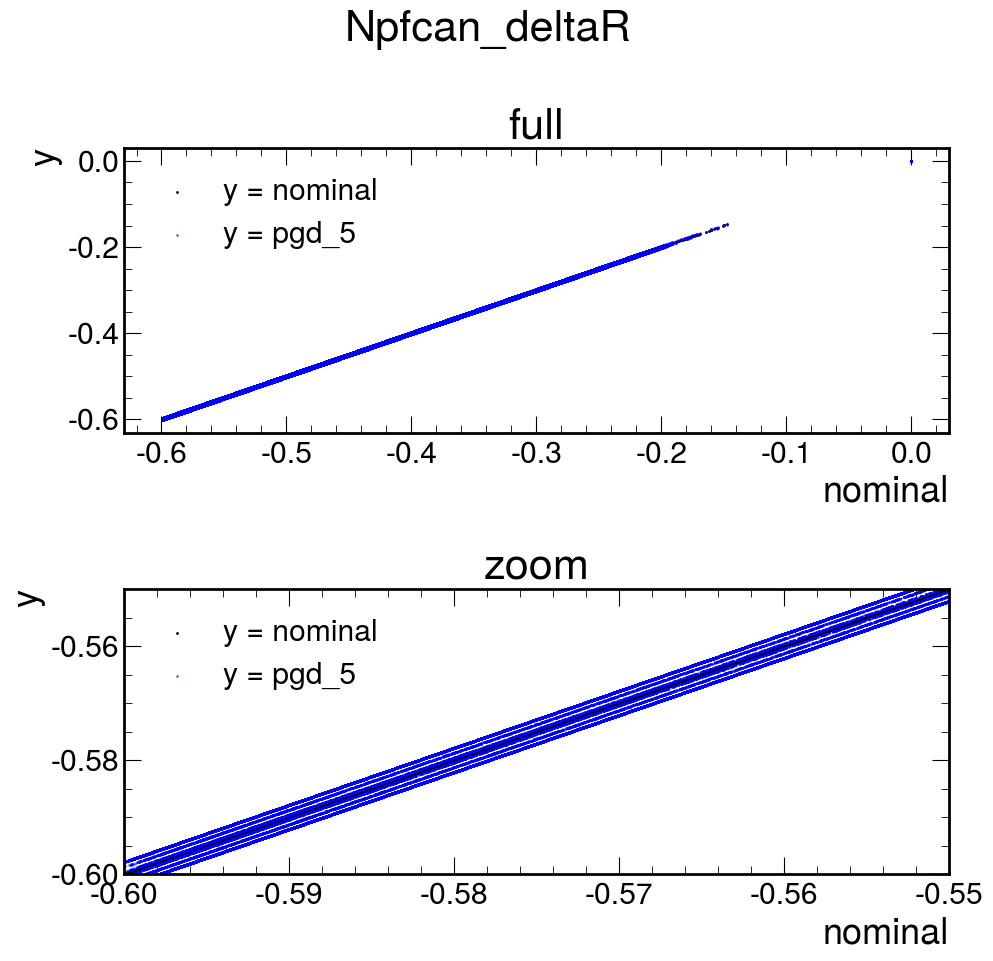

<Figure size 1000x1000 with 0 Axes>

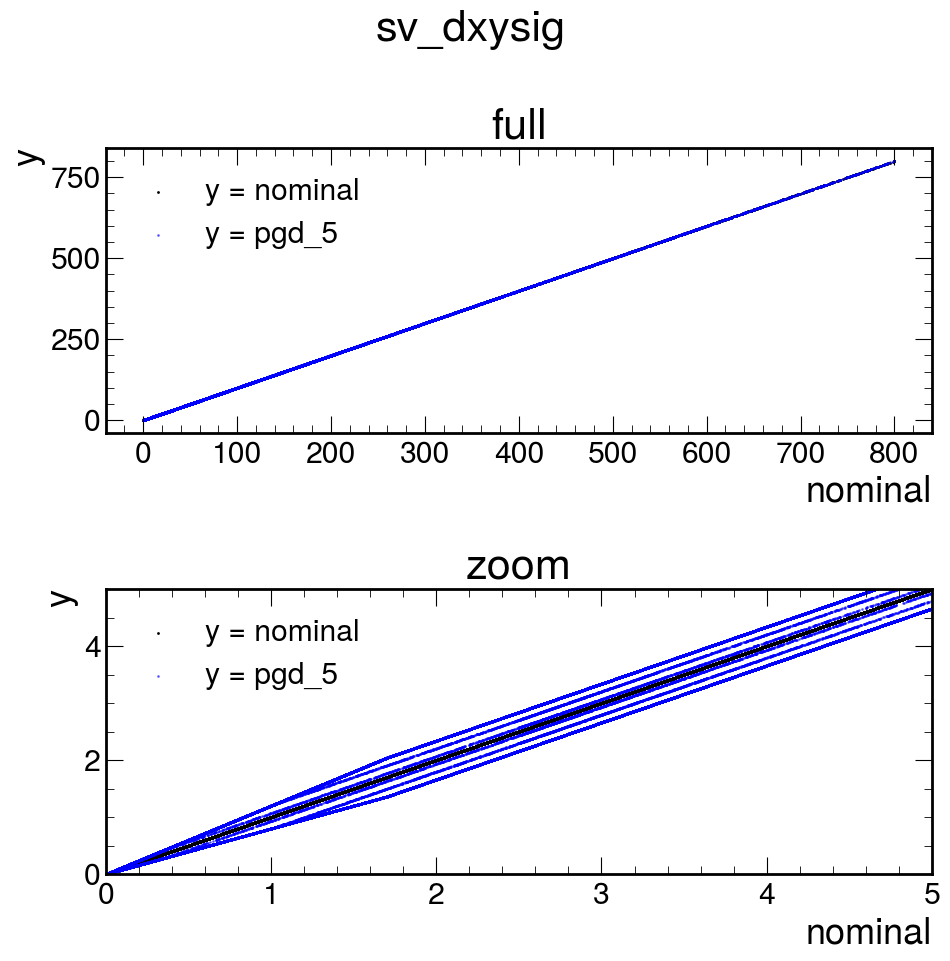

In [47]:
plot_feature("Cpfcan_BtagPf_trackSip2dSig", cpf_nom, cpf_pgd_5, "pgd_5", [0,10])
plot_feature("Npfcan_deltaR", npf_nom, npf_pgd_5, "pgd_5", [-0.6,-0.55])
plot_feature("sv_dxysig", vtx_nom, vtx_pgd_5, "pgd_5", [0,5])

<Figure size 1000x1000 with 0 Axes>

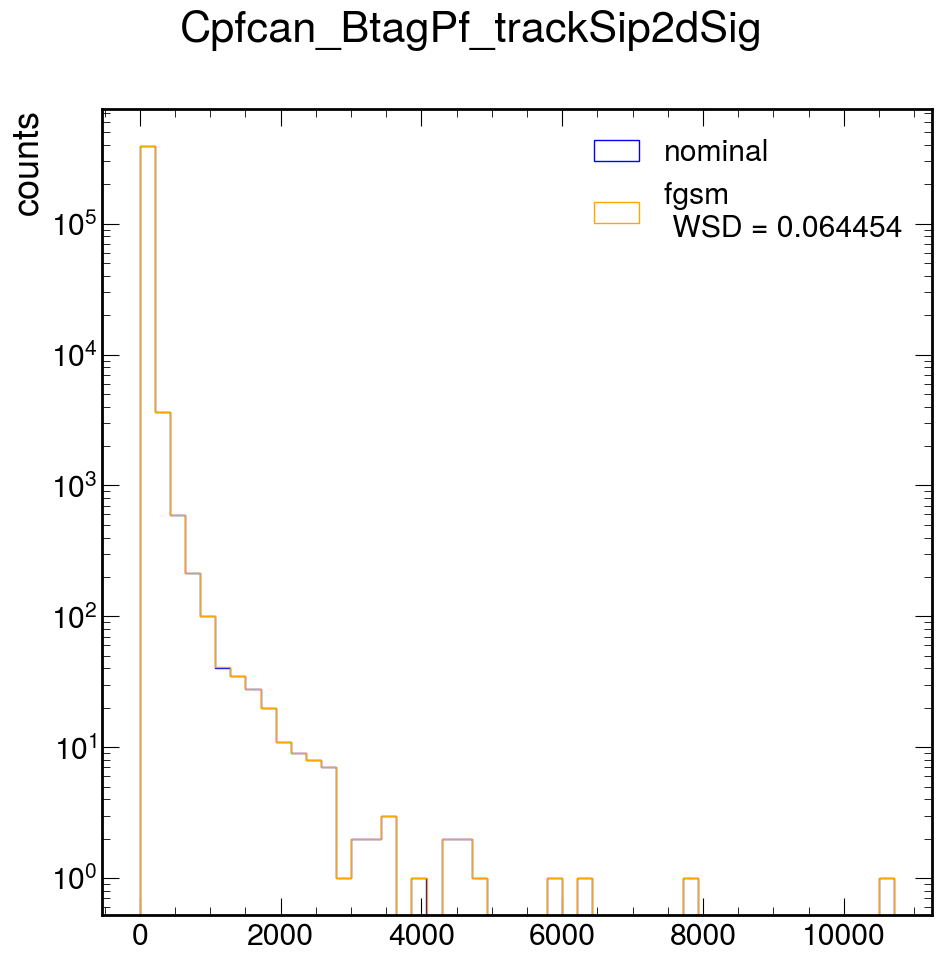

<Figure size 1000x1000 with 0 Axes>

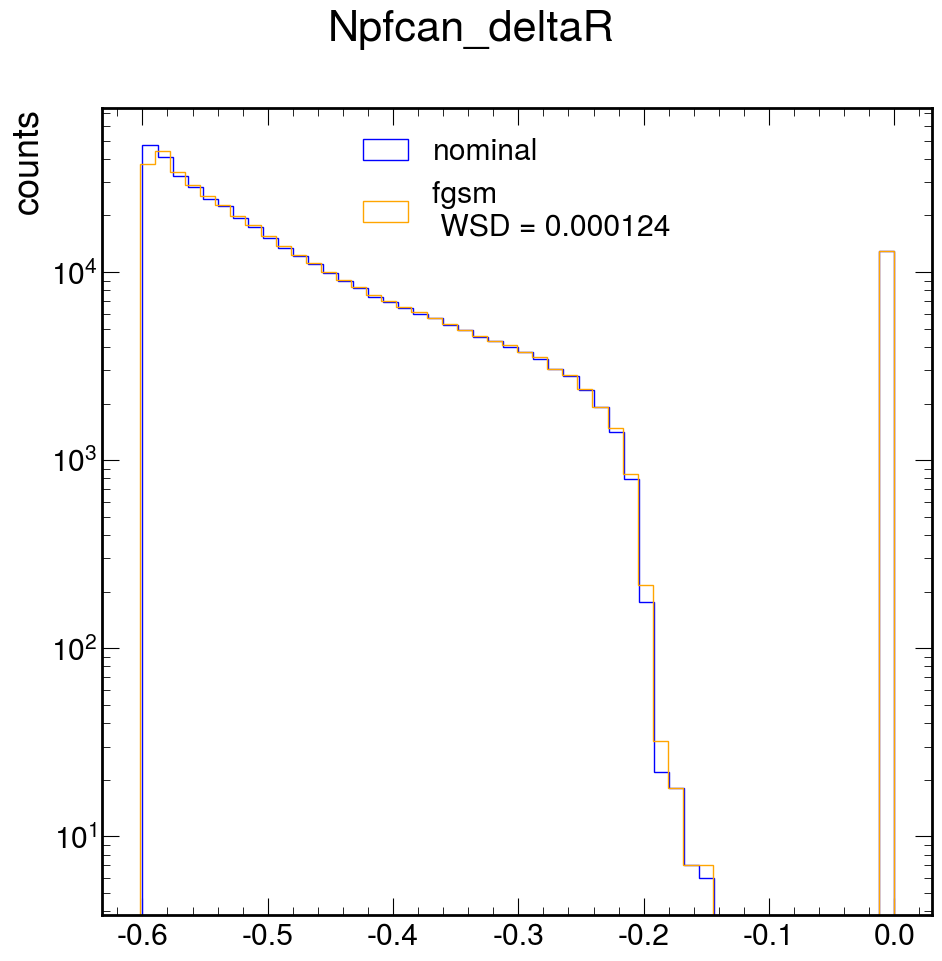

<Figure size 1000x1000 with 0 Axes>

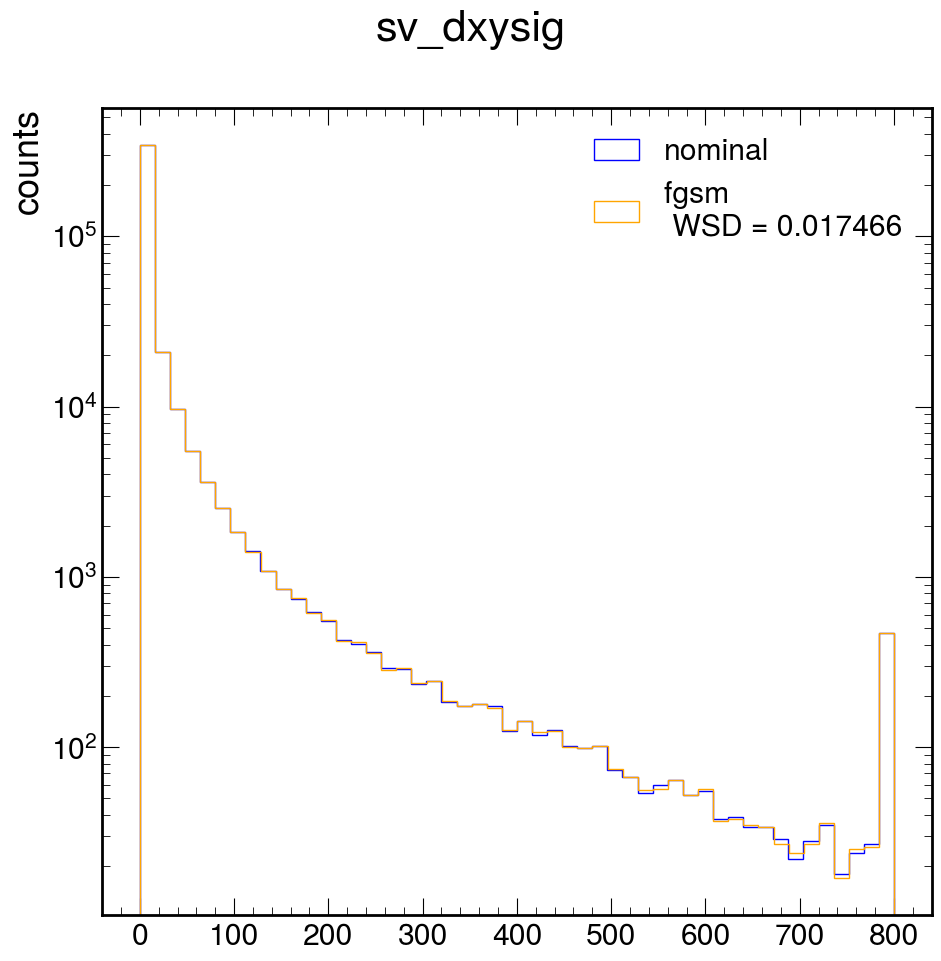

In [24]:
wsd_cpf.append(plot_hist("Cpfcan_BtagPf_trackSip2dSig", cpf_nom, cpf_pgd_5, "pgd_5"))
wsd_npf.append(plot_hist("Npfcan_deltaR", npf_nom, npf_pgd_5, "pgd_5"))
wsd_vtx.append(plot_hist("sv_dxysig", vtx_nom, vtx_pgd_5, "pgd_5"))

In [64]:
np.save(f"{output_dir}wsd/wsd_cpf.npy", wsd_cpf)
np.save(f"{output_dir}wsd/wsd_npf.npy", wsd_npf)
np.save(f"{output_dir}wsd/wsd_vtx.npy", wsd_vtx)

In [7]:
wsd_cpf = np.load(f"{output_dir}wsd/wsd_cpf.npy")
wsd_npf = np.load(f"{output_dir}wsd/wsd_npf.npy")
wsd_vtx = np.load(f"{output_dir}wsd/wsd_vtx.npy")

In [25]:
def plot_wsd(wsd_array, feature):
    plt.figure()
    x = np.array([0, 1, 2, 3, 4, 5])
    x_ticks = ["FGSM", "PGD (1)", "PGD (2)", "PGD (3)", "PGD (4)", "PGD (5)"]
    plt.xticks(x, x_ticks)
    plt.xlabel("attack")
    plt.ylabel("WSD")
    plt.title(f"{feature}")
    plt.plot(x, wsd_array)
    plt.tight_layout()
    plt.savefig(f"/home/home1/institut_3a/ajung/work/deepjet/attack_impact/wsd_{feature}.pdf")
    plt.show()
    plt.close()

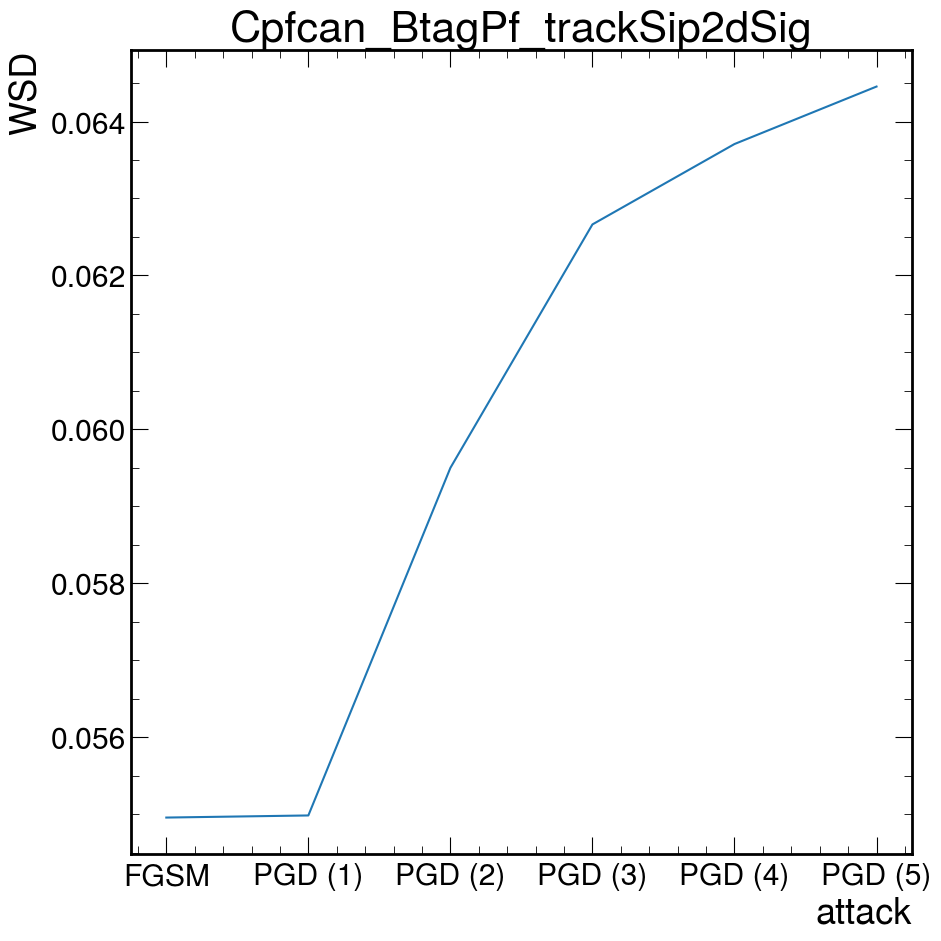

In [26]:
plot_wsd(wsd_cpf, "Cpfcan_BtagPf_trackSip2dSig")

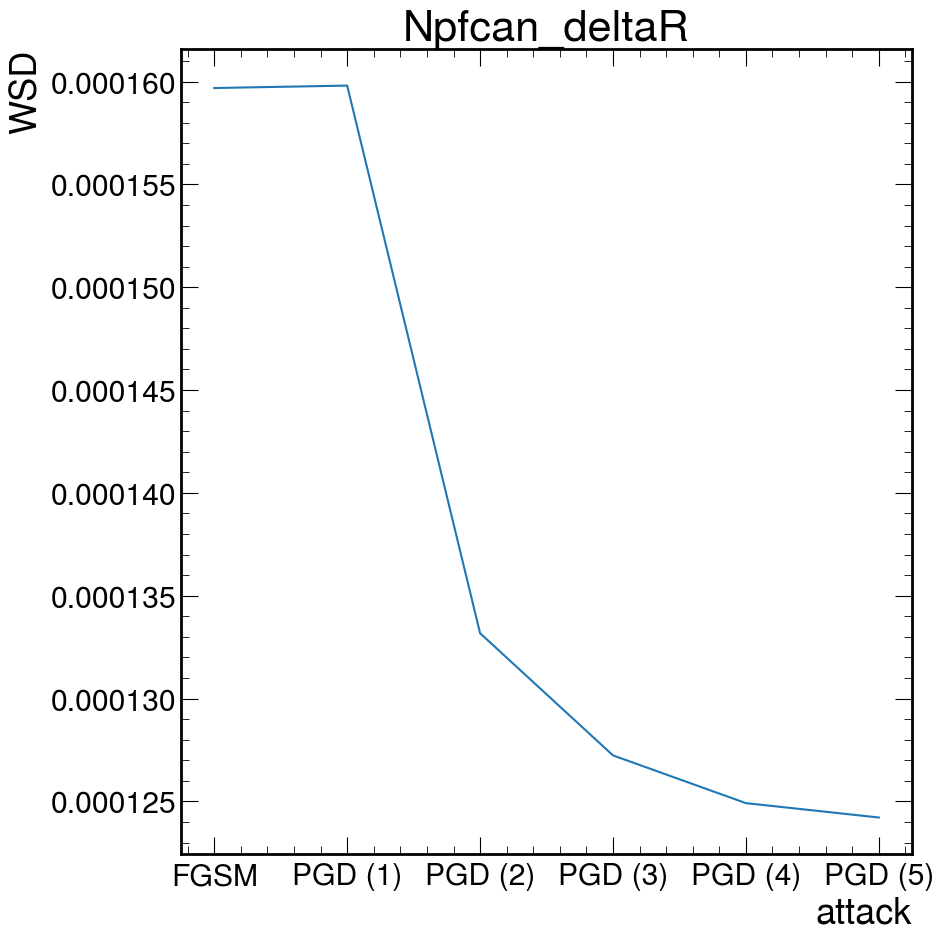

In [27]:
plot_wsd(wsd_npf, "Npfcan_deltaR")

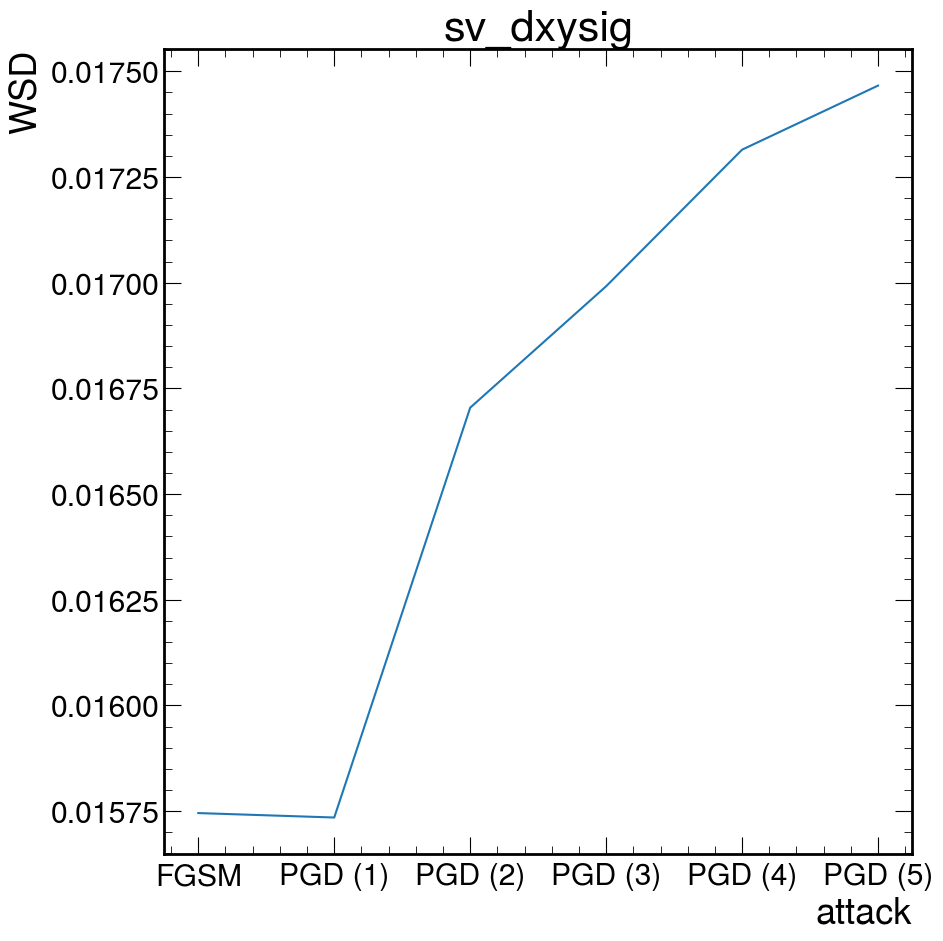

In [28]:
plot_wsd(wsd_vtx, "sv_dxysig")